In [60]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Title : Store-Level Demand Forecasting to Optimize Inventory, Staffing, and Promotions

# Abstract

This research investigates the factors influencing the performance of retail stores. Through an analysis of sales data from 1,115 Rossmann stores in Germany between 2013 and 2015, this study identifies the key drivers of store revenue and customer traffic. The methodology involved data preparation, an examination of individual store characteristics, and an analysis of sales patterns over time to determine the causes of sales fluctuations. 

The findings indicate that short-term promotional events are highly effective at boosting sales and customer traffic. Conversely, stores participating in a separate, long-term promotion program tended to exhibit lower sales overall. Sales volumes were also found to follow clear and predictable schedules. A strong weekly pattern was identified, with sales typically peaking on Mondays. A powerful yearly pattern also exists, with sales rising significantly every December in advance of the Christmas holiday season. 

Finally, the study focused on the impact of store competition. The arrival of a new competitor in close proximity caused a significant drop in an existing store's sales. This negative effect was more pronounced when the new competing store was located nearer. Interestingly, while the opening of a new rival had a clear impact, the simple distance to a long-standing competitor did not show a clear, lasting relationship with a store's average sales. These results demonstrate that performance is driven by a combination of short-term events, seasonal trends, and major market changes. 

# Problem Statement

Retail store performance is influenced by factors such as promotions, holidays, store format, assortment, customer volume, seasonal trends, and competition. A lack of understanding of these drivers often leads to poor forecasting, inefficient operations, and suboptimal decision-making in promotions, inventory, and expansion. Analyzing these factors is crucial in identifying key drivers that can optimize the store performance.

# Motivation

The analysis on store performance is necessary because a company often does not know the true reason why some stores are failing. Without understanding the key drivers, such as promotions, holidays, store format, assortment, and competition, resources may be wasted on poor inventory decisions or suboptimal store operations. Finding the root source of the issue helps improve performance across stores. 

Expansion decisions are critical because opening new store involve significant investments. Without data, a company is often just guessing where to build. Using data to find new locations helps identify safe bets, where there are enough customers and not too many competitors. 

Accurate insights into how promotions and holidays affect performance allow retailers to design more effective marketing campaigns and allocate resources efficiently. Analyzing store characteristics enables better inventory management, staffing, and forecasting. Furthermore, assessing the impact of new competitors helps retailers anticipate potential revenue loss and take strategic actions to maintain market share.

# Data Source

The dataset is from a competition hosted on Kaggle, aimed at forecasting the store sales of 1,115 Rossmann stores across Germany. It includes daily sales data and related variables (such as holidays, store details, competition details, and promotional events) of these stores from January 1, 2013 to July 31, 2015, a total of 1,017,209 records. The columns are composed of the following mixed data types:
- Numerical variables
- Categorical variables
- Date/time variables
- Boolean indicators

*(Source: [Kaggle — Rossmann Store Sales Competition](https://www.kaggle.com/competitions/rossmann-store-sales/data))*


# Data Exploration

### Data Fields  
The dataset contains the following columns:
- **Id** — Identifier representing a `(Store, Date)` pair within the test set.  
- **Store** — Unique identifier for each store.  
- **Sales** — Turnover for a given day (*target variable to predict*).  
- **Customers** — Number of customers on a given day.  
- **Open** — Store open indicator: `0 = Closed`, `1 = Open`.  
- **StateHoliday** — Indicates a state holiday:  
  `a = Public holiday`, `b = Easter holiday`, `c = Christmas`, `0 = None`.  
  Normally stores are closed on state holidays (with some exceptions).  
  *Note: Schools are also closed on public holidays and weekends.*  
- **SchoolHoliday** — Indicates whether the `(Store, Date)` was affected by the closure of public schools.  
- **StoreType** — Differentiates between four store models: `a`, `b`, `c`, `d`.  
- **Assortment** — Describes the product assortment level: `a = Basic`, `b = Extra`, `c = Extended`.  
- **CompetitionDistance** — Distance (in meters) to the nearest competitor store.  
- **CompetitionOpenSince[Month/Year]** — Approximate month and year when the nearest competitor opened.  
- **Promo** — Indicates whether a store ran a promotion on that day (`0 = No`, `1 = Yes`).  
- **Promo2** — Indicates participation in a continuous promotional campaign: `0 = Not participating`, `1 = Participating`.  
- **Promo2Since[Year/Week]** — Year and calendar week when the store began participating in Promo2.  
- **PromoInterval** — Lists the months in which Promo2 restarts, e.g. `"Feb,May,Aug,Nov"` means the promotion renews in February, May, August and November each year.  

### Summary Statistics
Number of observations (rows): 1,017,209 \
Number of unique stores: 1,115 \
Date range: January 1, 2013 – July 31, 2015 \
Overall daily average sales: 5773.82 \
Median daily sales: 5744.0 \
Overall daily average number of customers: 633.15 \
Median daily number of customers: 609

# Methodology

This study will analyze the various features of the dataset to identify the factors influencing each store’s sales performance during the period. The exploratory data analysis (EDA) will begin with data loading and preprocessing, which involves examining the dataset’s structure, checking data types, and identifying columns with missing values. This will be followed by a univariate analysis to assess the characteristics, distribution, and summary statistics of each feature. A bivariate analysis will then be conducted to explore relationships between different variables through visualization. In addition, a time series analysis will be performed to examine sales trends and seasonality over time. Finally, statistical analysis will be applied to determine how competition-related factors affect sales performance.

## Data Loading and Preprocessing
The dataset’s structure will be examined to verify the datatypes of each column and identify features with missing values. Missing values in the dataset will be handled through appropriate imputation methods to ensure data completeness and consitency.
 - Missing values will be handled as follows:
    - Competition Distance missing values will be imputed using the median.
    - All other missing values will be imputed with zeroes.
  - CompetitionOpenDate only provides the week and the year, the corresponding date will be set to the first day of the given week.  
  - Promo2OpenDate only provides the month and the year, the corresponding date will be set to the first day of the given month.
  - The data frame single_df, with only one record for each store, will be created to analyze categorical variables. 

## Univariate Analysis
Each feature of the data set will be analyzed individually to check its characteristics, distribution, and relevant summary statistics. Columns with numerical values will be assessed using descriptive measures such as count, mean, median, mode, standard deviation, minimum, quartile values, and maximum. On the other hand, categorical and Boolean values are evaluated based on frequency count. 

### Categorical Variables: StoreType and Assortment
For columns with categorical data (StoreType and Assortment), the single_df data frame will be used to avoid duplicate observations from multiple dates. The frequency of each category will be calculated using `.value_counts()` to determine their weight across the store network. The result for each variable will be visualizewd using Seaborn's `countplot`. 

### Competition Variables: CompetitionOpenSinceYear and CompetitionDistance

Competition-related variables (CompetitionOpenSinceYear and CompetitionDistance) will be analyzed using the following descriptive statistics:
- Count
- Mean
- Standard deviation
- Minimum
- Quartile Values
- Maximum
- Median
  
The values for both CompetitionOpenSinceYear and CompetitionDistance will be plotted using a histogram plot to show data skewness. For the CompetitionOpenSinceYear, values that were replaced with zero will be excluded in the graph. 

### Promotion Details: PromoInterval and Promo2SinceYear
- The PromoInterval column will be grouped by store to identify each store’s promotional cycle. The count of stores in each unique promo interval will be computed and the results will be plotted using a bar chart to determine the distribution of stores for different promotion schedules.
- The Promo2SinceYear column will be grouped by store to identify the year that each store began its second promotional activity. The count of stores in each year will be computed and the results will be plotted using a bar chart to determine the distribution of stores for different promotion schedules.

### Binary Indicators
The binary indicator variables (Open, Promo, StateHoliday, and SchoolHoliday) will be analyzed using count plots to visualize the number of occurrences for each category within these binary variables. A 2x2 grid of subplots will be created to display all four variables simultaneously, allowing for a quick comparison of how often each condition occurs in the dataset. 

### Performance Metrics
Performance indicators (Sales and Customers) will be analyzed using histograms. The dataset will be filtered to include only records where stores are open. Seaborn's `histplot` will be used to plot the distributions of each variable with kernel density (KDE) overlaid. The histograms will be plotted side by side to examine the frequency distribution of daily sales and customer counts, providing an initial assessment of store performance patterns.

## Bivariate Analysis
The relationship between the following features will be examined through visualization using histograms, bar charts, and box plots: 
- Store Type vs Assortment
- Store Type vs Promotional Interval
- School Holiday vs Sales
- State Holiday vs Sales
- School HOliday vs Customers
- State Holiday vs Customers
- Sales vs Promo
- Sales vs Promo2
- Customers vs Promo
- Customers vs Promo2
- StoreType vs Sales
- Assortment vs Sales 
- StoreType vs Customers
- Assortment vs Customers 


### Assortment and PromoInterval by StoreType
- A cross-tabublation will be created between StoreType, Assortment, and PromoInterval to summarize the distribution of the stores across different categories and promotional schedules.
- Side-by-side countplots will be generated using Seaborn to compare the distribution of the following categorical variables:
  - Store type broken down by assortment to show how each store type is represented accross different assortments. 
  - Store type broken down by promo interval to show promotional paterns for each store type. 

### StoreType, StateHoliday, SchoolHoliday, DayOfWeek, and Open

- Cross-tabulations will be created between the following variables:
  - DayOfWeek vs Open: To examine which days stores are more likely to be open.
  - StateHoliday vs SchoolHoliday: To identify overlaps between different types of holidays.
  - Open vs StoreType and StateHoliday/SchoolHoliday: To assess how store type relates to operational status during different holidays.

### Holidays vs Sales and Customers
- The dataset will be filtered to include only days when stores are open to ensure that sales and customer data only reflect days when the store is operating.
- The average sales and customers per store, grouped by school and state holiday type, will be computed.
- Side-by-side bar plots will be generated using Seaborn to compare the following variables:
  - SchoolHoliday vs Sales
  - StateHoliday vs Sales
  - SchoolHoliday vs Customers
  - StateHoliday vs Customers
- This will show how holidays influence store operations and customer behavior. 

### Promotions vs Sales and Customers
- The dataset will be filtered to include only days when stores are open to ensure that sales and customer data only reflect days when the store is operating.
- The average sales and customers per store will be calculated with and without Promo and Promo2.
- Side-by-side histograms will be generated using Seaborn's `histplot`, with promotion status as hue to differentiate distributions. Separate plots will be created for Sales and Customers under Promo and Promo2 to show a comparison of store performance during promotional and non-promotional periods. 

### StoreType and Assortment vs Sales and Customers
- The dataset will be filtered to include only days when stores are open to ensure that sales and customer data only reflect days when the store is operating.
- The average sales and customers per store will be calculated grouped by store type and assortment category.
- The following boxplots will be generated using Seaborn:
  - StoreType vs Sales
  - Assortment vs Sales
  - StoreType vs Customers
  - Assortment vs Customers
- These will show the performance patterns accross different store types and assortment categories.  

## Timeseries Analysis
Time series analysis will be conducted to examine temporal patterns in store sales. Daily trends will be analyzed by DayOfWeek, StoreType, and Assortment, monthly trends by PromoInterval and StoreType, and weekly sales will be decomposed into trend, seasonal, and residual components.

### DayOfWeek vs Mean Sales by StoreType and Assortment
- The dataset will be aggregated to calculate the average daily sales for each combination of DayOfWeek, StoreType, and Assortment.
- The aggregated data will be visualized using Seaborn’s catplot with kind="point", creating facet grids with StoreType as columns and Assortment as rows. Each point in the plot represents the mean sales for a specific day of the week within the corresponding store type and assortment category.
- This will compare the daily sales trends across store types and assortments, highlighting patterns such as which days typically experience higher sales and how these patterns vary by store characteristics.

### Monthly Average Sales by PromoInterval and StoreType
- Monthly average Sales will be calculated for each combination of StoreType and PromoInterval by grouping the data by month, StoreType, and PromoInterval, and computing the mean.
- The results will plotted using Seaborn’s relplot with kind="line", creating facet grids with StoreType as rows and PromoInterval as columns. Each line represents the trend of average monthly sales over time.
- To highlight months in which recurring promotions were active, vertical dashed lines will be added at the corresponding dates. The x-axis will be formatted to display months and years clearly.
- This visualization allowed for the assessment of seasonal sales trends and the temporal impact of promotional cycles across different store types.

### Weekly Sales Decomposition
- A seasonal decomposition will be applied to the weekly Sales series using a multiplicative model. This separates the series into trend, seasonal, and residual components. This decomposition allows visualization of underlying patterns, seasonal fluctuations, and irregularities in store revenue over time.

## Competition Analysis
The sales performance of a store before a competitor opens will be assessed against its sales performance after the competitor opens. Additionally, this section will assess if there is a correlation between the store’s sales performance and competition distance. 

To examine the effect of new competitors on store performance, the dataset will be filtered to focus on stores that experienced a competitor opening between January 1, 2014, and July 31, 2014. This specific period was selected to ensure that each store would have at least one year of sales data before the competitor opened and one year of sales data after.

### New Competition
- For the stores that meet the above criteria, mean daily sales will calculated for the year before and year after the competitor's opening.
- The Shapiro-Wilk test will applied to check for normality of sales distributions before and after the competition event. If the differences in sales are not normally distributed, the Wilcoxon signed-rank test will be used to assess whether the change in mean sales was statistically significant.
- The results will be complemented by scatter plots comparing pre- and post-competition sales, and regression plots showing the relationship between competition distance and changes in mean sales.
  
### Long Term Competition
- The dataset will be aggregated by store and store type to compute mean sales and retrieve the corresponding CompetitionDistance.
- Normality of distances will be assessed with the Shapiro-Wilk test, and monotonic relationships will be evaluated using the Spearman rank correlation for each store type.
- Regression plots will be generated for each store type to visually inspect the relationship between mean sales and competition distance.

# Results and Discussion

In [61]:
# Connect to database
conn = sqlite3.connect('rossmann.db')
cursor = conn.cursor()

# Print table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('rossmann',)]


In [62]:
# Assign 'rossmann' table to Pandas DataFrame
sql = "SELECT * FROM rossmann"
df = pd.read_sql(sql, conn)

### Data Fields  
*(Source: [Kaggle — Rossmann Store Sales Competition](https://www.kaggle.com/competitions/rossmann-store-sales/data))*

- **Id** — Identifier representing a `(Store, Date)` pair within the test set.  
- **Store** — Unique identifier for each store.  
- **Sales** — Turnover for a given day (*target variable to predict*).  
- **Customers** — Number of customers on a given day.  
- **Open** — Store open indicator: `0 = Closed`, `1 = Open`.  
- **StateHoliday** — Indicates a state holiday:  
  `a = Public holiday`, `b = Easter holiday`, `c = Christmas`, `0 = None`.  
  Normally stores are closed on state holidays (with some exceptions).  
  *Note: Schools are also closed on public holidays and weekends.*  
- **SchoolHoliday** — Indicates whether the `(Store, Date)` was affected by the closure of public schools.  
- **StoreType** — Differentiates between four store models: `a`, `b`, `c`, `d`.  
- **Assortment** — Describes the product assortment level: `a = Basic`, `b = Extra`, `c = Extended`.  
- **CompetitionDistance** — Distance (in meters) to the nearest competitor store.  
- **CompetitionOpenSince[Month/Year]** — Approximate month and year when the nearest competitor opened.  
- **Promo** — Indicates whether a store ran a promotion on that day (`0 = No`, `1 = Yes`).  
- **Promo2** — Indicates participation in a continuous promotional campaign: `0 = Not participating`, `1 = Participating`.  
- **Promo2Since[Year/Week]** — Year and calendar week when the store began participating in Promo2.  
- **PromoInterval** — Lists the months in which Promo2 restarts, e.g. `"Feb,May,Aug,Nov"` means the promotion renews in February, May, August and November each year.  


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   index                      1017209 non-null  int64  
 1   Store                      1017209 non-null  int64  
 2   DayOfWeek                  1017209 non-null  int64  
 3   Date                       1017209 non-null  object 
 4   Sales                      1017209 non-null  int64  
 5   Customers                  1017209 non-null  int64  
 6   Open                       1017209 non-null  int64  
 7   Promo                      1017209 non-null  int64  
 8   StateHoliday               1017209 non-null  object 
 9   SchoolHoliday              1017209 non-null  int64  
 10  StoreType                  1017209 non-null  object 
 11  Assortment                 1017209 non-null  object 
 12  CompetitionDistance        1014567 non-null  float64
 13  CompetitionO

In [64]:
# missing values in CompetitionDistance
df[pd.isnull(df.CompetitionDistance)]

,index,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,290,291,5,2015-07-31 00:00:00.000000,10052,973,1,1,0,1,d,a,NaN,NaN,NaN,0,NaN,NaN,None
621,621,622,5,2015-07-31 00:00:00.000000,6306,540,1,1,0,1,a,c,NaN,NaN,NaN,0,NaN,NaN,None
878,878,879,5,2015-07-31 00:00:00.000000,6000,466,1,1,0,0,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"
1405,1405,291,4,2015-07-30 00:00:00.000000,9030,883,1,1,0,1,d,a,NaN,NaN,NaN,0,NaN,NaN,None
1736,1736,622,4,2015-07-30 00:00:00.000000,5412,406,1,1,0,1,a,c,NaN,NaN,NaN,0,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015601,1015601,622,3,2013-01-02 00:00:00.000000,4080,451,1,0,0,1,a,c,NaN,NaN,NaN,0,NaN,NaN,None
1015858,1015858,879,3,2013-01-02 00:00:00.000000,3077,326,1,0,0,1,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"
1016385,1016385,291,2,2013-01-01 00:00:00.000000,0,0,0,0,a,1,d,a,NaN,NaN,NaN,0,NaN,NaN,None
1016716,1016716,622,2,2013-01-01 00:00:00.000000,0,0,0,0,a,1,a,c,NaN,NaN,NaN,0,NaN,NaN,None


In [65]:
# Used for easier time series analysis
indexed_df = df.copy()
indexed_df['Date'] = pd.to_datetime(df['Date'])
indexed_df = indexed_df.set_index('Date')
indexed_df = indexed_df.sort_index()

### CompOpenDate and Promo2OpenDate
These will be used for time series analysis later on. Declared now before missing values are dealt with. Since exact date is not given, all date values will be on the first of month or week given

In [66]:
from datetime import date

# competition
mask_comp = (
    indexed_df['CompetitionOpenSinceYear'].notna()
    & indexed_df['CompetitionOpenSinceMonth'].notna()
    & (indexed_df['CompetitionOpenSinceYear'] > 0)
)
indexed_df.loc[mask_comp, 'CompOpenDate'] = indexed_df.loc[mask_comp].apply(
    lambda r: date(int(r['CompetitionOpenSinceYear']), int(r['CompetitionOpenSinceMonth']), 1),
    axis=1
)

# promo
mask_promo = (
    indexed_df['Promo2SinceYear'].notna()
    & indexed_df['Promo2SinceWeek'].notna()
    & (indexed_df['Promo2SinceYear'] > 0)
    & (indexed_df['Promo2SinceWeek'] > 0)
    & (indexed_df['Promo2SinceWeek'] <= 52)
)
indexed_df.loc[mask_promo, 'Promo2OpenDate'] = indexed_df.loc[mask_promo].apply(
    lambda r: date.fromisocalendar(int(r['Promo2SinceYear']), int(r['Promo2SinceWeek']), 1),
    axis=1
)


### Dealing with missing values

***Competition Distance***

NaN values on competition data seems to have no pattern. This will be assumed to be missing data. as such Competition Distance will be imputed with the median.

All other missing values will be filled with zeros. For Promo2, if there's no information about it, there also seems to be no information about its related features. These will be filled with zeros. The same reasoning and treatment will be applied to competition data other than distance.

In [67]:
df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(), inplace = True)
df.fillna(0, inplace = True)

/tmp/ipykernel_39335/4205127059.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(), inplace = True)


In [68]:
df.isnull().sum()

index                        0
Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [69]:
df.head()

,index,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,1,5,2015-07-31 00:00:00.000000,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,2,5,2015-07-31 00:00:00.000000,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,2,3,5,2015-07-31 00:00:00.000000,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,3,4,5,2015-07-31 00:00:00.000000,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,4,5,5,2015-07-31 00:00:00.000000,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [70]:
# DataFrame with only one record for each Store. For Analysis on Categorical Variables
single_df = df.drop_duplicates('Store')

# Univariate Analysis

## Categorical Variables: StoreType and Assortment

In [71]:
single_df['StoreType'].value_counts()

StoreType
a    602
d    348
c    148
b     17
Name: count, dtype: int64

***StoreType***   
The frequency table shows the dominance of type **`a`** stores, which account for **602 out of 1,115 total stores (~54%)**.  
Type **`d`** stores follow with **348 (31%)**, then **`c`** with **148 (13%)**, while **`b`** stores are extremely rare with only **17 (1.5%)**.  

In [72]:
single_df['Assortment'].value_counts()

Assortment
a    593
c    513
b      9
Name: count, dtype: int64

***Assortment***   
The frequency table confirms the dominance of assortment **`a`** stores, which account for **593 out of 1,115 total stores (~53%)**.  
assortment **`b`** stores follow closely with **513 (46%)**, then **`c`** lag very far behind with only **9 (~0.8%)**, 

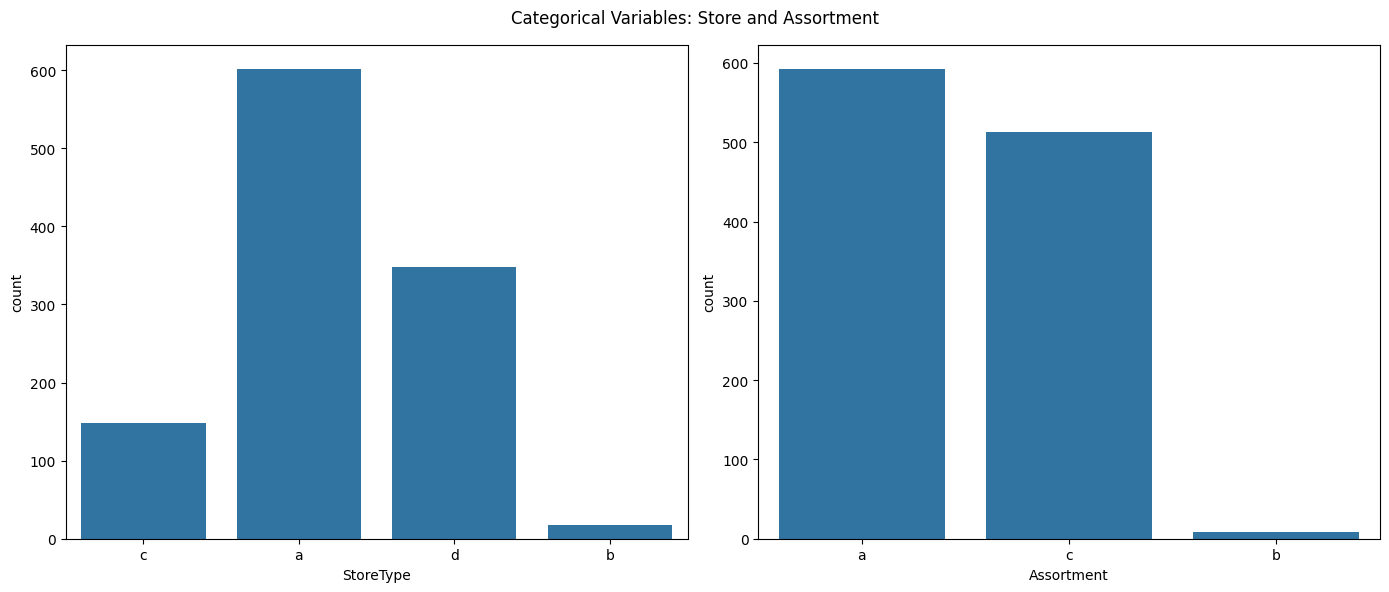

In [73]:
fig1, axes1 = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot(data=single_df, x='StoreType', ax=axes1[0])
sns.countplot(data=single_df, x='Assortment', ax=axes1[1])
fig1.suptitle('Categorical Variables: Store and Assortment')
plt.tight_layout()
plt.show()

**StoreType**  
The StoreType variable categorizes stores into four operational models: `a`, `b`, `c`, and `d`.  
The plot shows that type **`a`** stores dominate, followed by **`d`** and **`c`**, while **`b`** stores are rare.  
This imbalance implies that the dataset mainly reflects the behavior of type *a* outlets, potentially biasing any model patterns toward their characteristics.  
Less common types, such as *b*, may represent niche formats (e.g., smaller or specialized branches) may need separate consideration when evaluating performance performance or the impact of promotions.   

**Assortment**  
The `Assortment` field describes a given store's product variety: `a = Basic`, `b = Extra`, `c = Extended`.  
The plot shows that **`a`** (basic) and **`c`** (extended) assortments dominate, while **`b`** (extra) is nearly absent.  
This suggests that stores typically follow either a minimal or broad product strategy, with few in between.  
Because both `StoreType` and `Assortment` display strong imbalance, a bivariate analysis  can help identify whether specific store types favor certain assortment levels.

## Competition Variables: CompetitionOpenSinceYear and CompetitionDistance

In [74]:
comp_open = single_df[single_df['CompetitionOpenSinceYear'] > 0]

# Numerical summaries
comp_summary = comp_open['CompetitionOpenSinceYear'].describe()

dist_summary = single_df['CompetitionDistance'].describe()

# Combine summaries into a single table
comp_desc_stats = pd.concat([comp_summary, dist_summary], axis=1)
comp_desc_stats.loc['median'] = [comp_open['CompetitionOpenSinceYear'].median(), single_df['CompetitionDistance'].median()]
comp_desc_stats.columns = ['CompetitionOpenSinceYear', 'CompetitionDistance']
comp_desc_stats

,CompetitionOpenSinceYear,CompetitionDistance
count,761.000000,1115.000000
mean,2008.668857,5396.627803
std,6.195983,7654.508236
min,1900.000000,20.000000
25%,2006.000000,720.000000
50%,2010.000000,2330.000000
75%,2013.000000,6875.000000
max,2015.000000,75860.000000
median,2010.000000,2330.000000


***Competition Variables***  
The competition-related variables describe when and how close each store’s nearest competitor is located.  
For `CompetitionOpenSinceYear`, the summary shows that **761 stores** have valid entries, with an **average opening year of 2008.7** and a **median of 2010**.  
Most competitors opened between **2006 (25th percentile)** and **2013 (75th percentile)**, with the earliest recorded as **1900** and the most recent as **2015**.  
This suggests that the majority of competing stores emerged within the past two decades, indicating a steady rise in local market competition.  

For `CompetitionDistance`, all the same number of stores have distance data, where the rest were imputed with the median. The resulting **average distance of 5,397 meters** and a **median of 2,330 meters**.  
Half of the stores face competitors within roughly **0.7 to 6.9 km (25th–75th percentile)**, while some are located as far as **75.9 km** away.  
The wide range and large standard deviation (**7,654 m**) confirm that competitive proximity varies greatly across store locations.


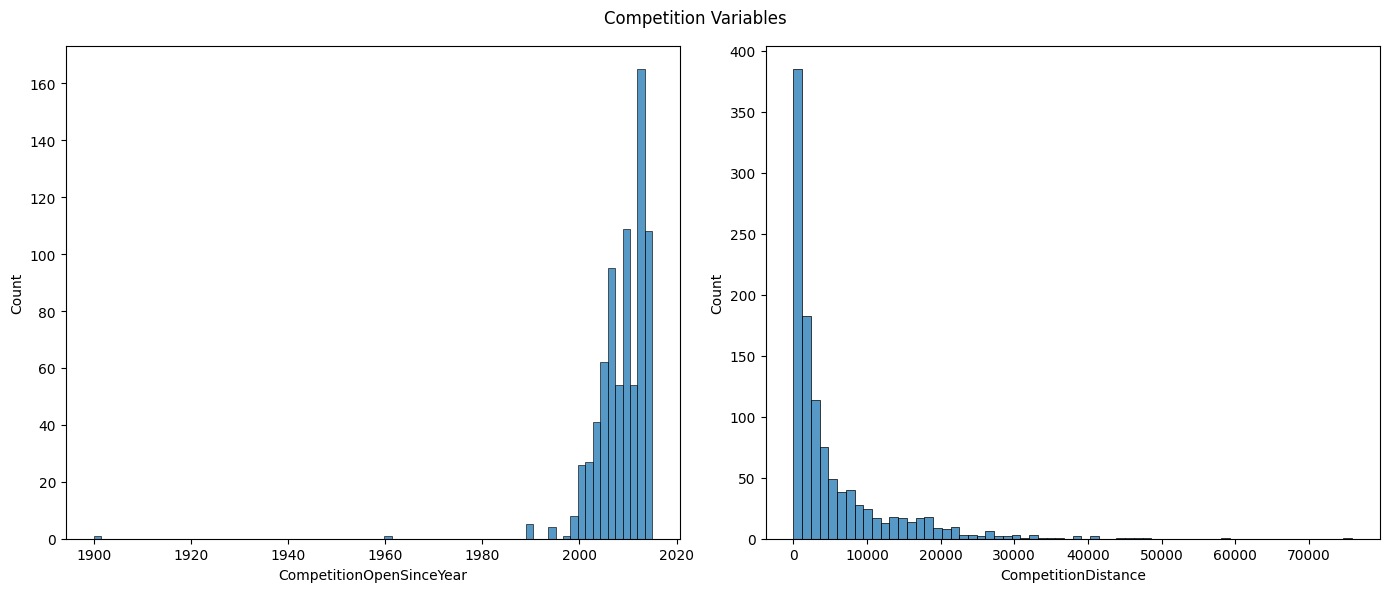

In [75]:
fig2, axes2 = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(data=comp_open,  x='CompetitionOpenSinceYear', ax=axes2[0])
sns.histplot(data=single_df, x='CompetitionDistance', ax=axes2[1])
fig2.suptitle('Competition Variables')
plt.tight_layout()
plt.show()

**CompetitionOpenSinceYear**  
This variable records the year when the nearest competitor opened.  
The histogram shows a strong concentration from **2000 onward**, with a notable rise after **2010**, indicating that most competing stores are relatively recent.  
The skew toward later years suggests increasing retail competition over time, reflecting industry expansion ***or*** improved data availability in recent decades.   
While not clear in the visualization, the oldest store recorded as competition has been open since 1900 (assuming data is reliable).    
**Note that null values were replaced with zero previously. For the purposes of this visualization those rows have been excluded.**

**CompetitionDistance**  
`CompetitionDistance` measures the distance (in meters) to the nearest competitor.  
The distribution is **right-skewed**, with a majority of stores having competitors within **10,000 meters**, and a long tail extending beyond **70,000 meters**.  
This indicates that most Rossmann stores face nearby competition, while a small subset operate in relatively isolated regions.  
Together, these variables describe the competitive intensity surrounding each store, which is likely to influence sales performance.


## Promotion Details: PromoInterval and Promo2SinceYear

In [76]:
df.groupby('Store')['PromoInterval'].unique().value_counts()

PromoInterval
[0]                   544
[Jan,Apr,Jul,Oct]     335
[Feb,May,Aug,Nov]     130
[Mar,Jun,Sept,Dec]    106
Name: count, dtype: int64

***PromoInterval***   
The `PromoInterval` variable indicates the recurring months when continuous promotions (`Promo2`) restart.  
The tabulation shows that **544 stores (≈49%)** have `"0"`, meaning they **do not participate** in the continuous promotion cycle.  
Among the participating stores, the most common schedule is **"Jan,Apr,Jul,Oct" (335 stores, ≈30%)**, followed by **"Feb,May,Aug,Nov" (130 stores, ≈12%)**, and **"Mar,Jun,Sept,Dec" (106 stores, ≈9%)**. 

In [77]:
df.groupby('Store')['Promo2SinceYear'].unique().value_counts()

Promo2SinceYear
[0.0]       544
[2011.0]    128
[2013.0]    120
[2014.0]     95
[2012.0]     81
[2009.0]     73
[2010.0]     64
[2015.0]     10
Name: count, dtype: int64

***Promo2SinceYear***  
The `Promo2SinceYear` variable records the year each store began participating in the continuous promotion program.  
The summary shows that **544 stores (≈49%)** have `[0.0]`, indicating **no participation** in `Promo2`.  
Among participating stores, most began between **2009 and 2014**, with the highest concentration in **2011 (128 stores, ≈12%)**, followed by **2013 (120 stores, ≈11%)** and **2014 (95 stores, ≈9%)**.  
Only a few stores joined as early as **2009** or as late as **2015**, though the latter may be a result of the dataset cutoff. 

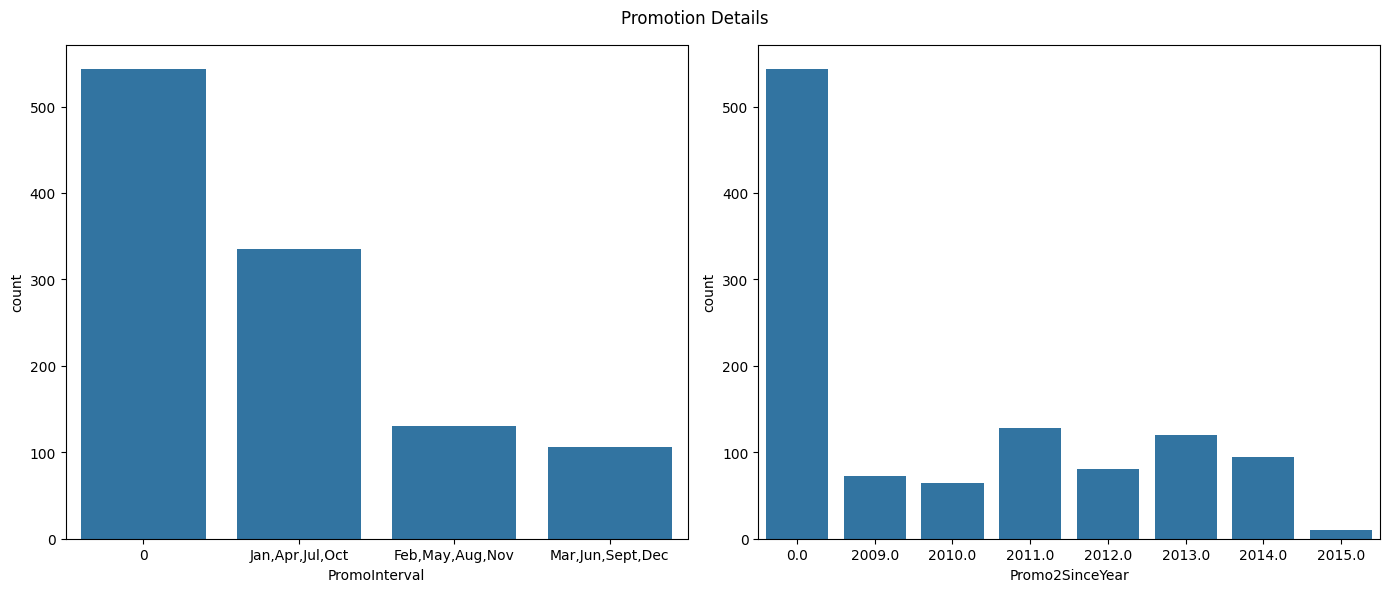

In [78]:
fig3, axes3 = plt.subplots(1, 2, figsize=(14, 6))
y = (
    df.groupby('Store')['PromoInterval']
    .unique()
    .astype(str)
    .str.replace(r"[\[\]']", "", regex=True)
    .value_counts()
)
x = y.index
sns.barplot(x=x, y=y, ax=axes3[0])
sns.countplot(data=single_df, x='Promo2SinceYear', ax=axes3[1])
fig3.suptitle('Promotion Details')
plt.tight_layout()
plt.show()

***PromoInterval***   
The plot shows that nearly half of the stores have **no active promotion cycle** (`"None"`). It should be noted that each store in this dataset only has one unique value for each PromoInterval, meaning for stores that do continuous promotions, they have only done so during **one of three quarterly schedules**: `"Jan,Apr,Jul,Oct"`, `"Feb,May,Aug,Nov"`, or `"Mar,Jun,Sept,Dec"`.  
These staggered intervals indicate a structured but selective promotion strategy where only a portion of stores engage in recurring campaigns, likely aligned with local marketing or operational planning.


**Promo2SinceYear**  
Participation increases sharply from **2010 to 2013**, peaking around **2011–2013**, then drops by **2015**, possibly due to either dataset cutoff or stabilization of program enrollment.  
This temporal spread indicates that Rossmann expanded the program gradually, and later entrants might differ in performance compared to early adopters.  
Combining both plots highlights that while many stores joined `Promo2` during the early 2010s, **a majority still do not maintain regular recurring promotions**.

## (State Holidays and) Binary Indicators: Open, Promo, School Holiday  


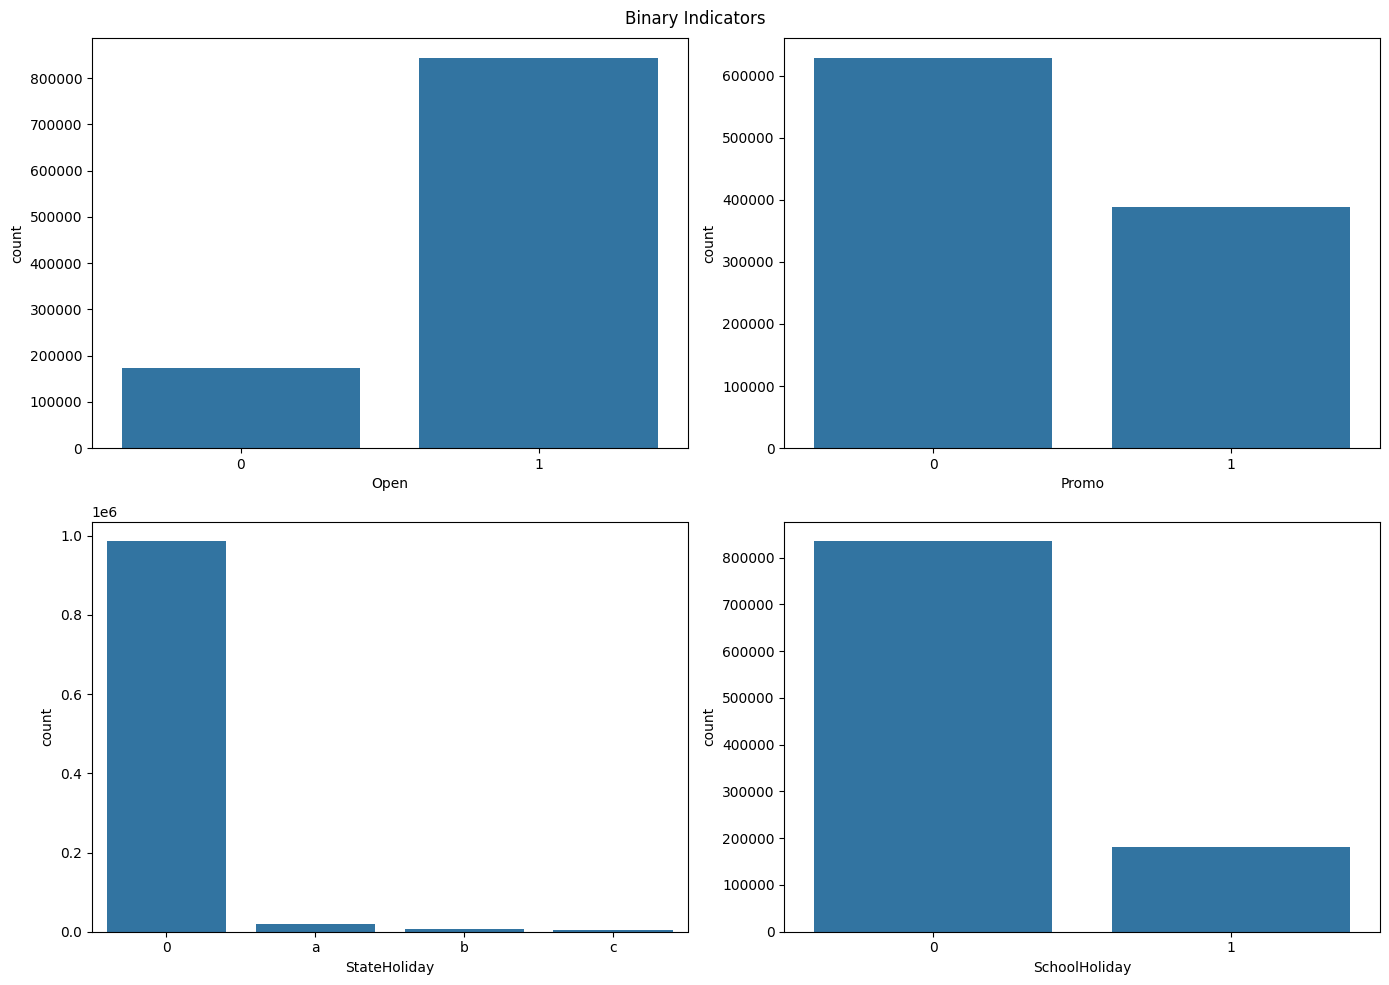

In [79]:
fig4, axes4 = plt.subplots(2, 2, figsize=(14, 10))
sns.countplot(data=df, x='Open', ax=axes4[0, 0])
sns.countplot(data=df, x='Promo', ax=axes4[0, 1])
sns.countplot(data=df, x='StateHoliday', ax=axes4[1, 0])
sns.countplot(data=df, x='SchoolHoliday', ax=axes4[1, 1])
fig4.suptitle('Binary Indicators')
plt.tight_layout()
plt.show()


**Open**  
The `Open` field indicates whether a store was operating (`1`) or closed (`0`) on a given day.  
The vast majority of observations show `Open = 1`, confirming that most records correspond to regular business days.  
Closed days are relatively rare and typically coincide with holidays or maintenance periods.  
This imbalance means models should treat closed days carefully—sales are always zero when `Open = 0`.

**Promo**  
The `Promo` variable denotes whether a store was running a promotion on a given day.  
Roughly two-thirds of the data shows `Promo = 0`, meaning most days have no active promotion.  
However, the significant number of `Promo = 1` entries implies that promotional events are frequent enough to potentially influence daily sales patterns.  
This feature is directly linked to demand spikes and should be a strong predictor in forecasting models.

**StateHoliday**  
`StateHoliday` identifies public holidays that can impact operations:  
`a = Public holiday`, `b = Easter`, `c = Christmas`, `0 = None`.  
The data shows an overwhelming majority of `0`, with very few instances of `a`, `b`, or `c`.  
Thus, while holidays strongly affect behavior, they occur infrequently in the dataset, making them sparse but high-impact variables.

**SchoolHoliday**  
This field indicates whether the date was affected by school closures.  
Most observations fall under `0`, meaning no school holiday, while a smaller but notable portion is marked `1`.  
These periods can influence customer flow, as family shopping behavior tends to shift when schools are closed.  
The pattern suggests that while school holidays are less common, they still occur regularly enough to affect weekly or seasonal sales trends.


## Performance Metrics: Sales and Customers (Open Stores Only)  


In [80]:
open_df = indexed_df[indexed_df['Open'] == 1]

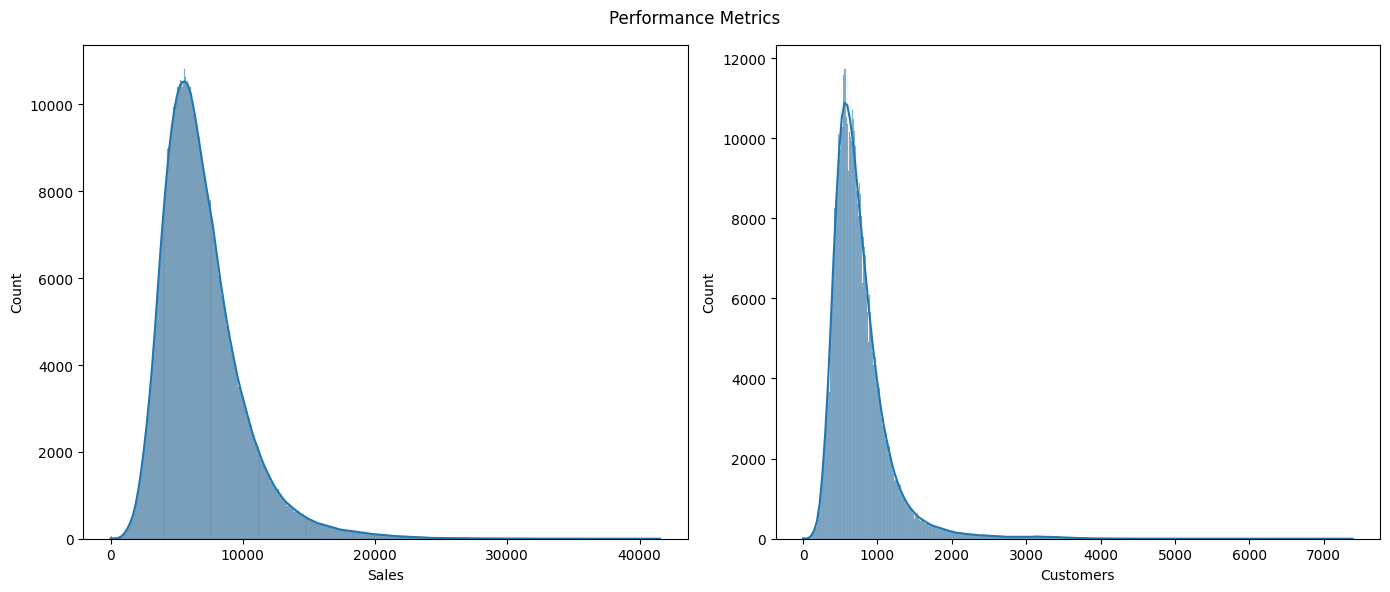

In [81]:
fig5, axes5 = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(data=open_df, kde=True, x='Sales', ax=axes5[0])
sns.histplot(data=open_df, kde=True, x='Customers', ax=axes5[1])
fig5.suptitle('Performance Metrics')
plt.tight_layout()
plt.show()

**Sales**  
The `Sales` variable represents daily turnover for each open store.  
When filtering out closed days (`Open = 0`), the distribution becomes **right-skewed**, with most stores recording daily sales between **5,000–10,000** units (presumably euros).  
A long tail extends toward higher values, showing that a few stores achieve exceptional turnover, possibly due to larger customer bases or regional advantages.  
The low occurrences of values near zero suggests that the decision filter out closed days was appropriate.  

**Customers**  
The `Customers` variable counts the number of shoppers on open days.  
Its distribution mirrors `Sales`, which is also **right-skewed** with most values below **1,000 customers per day**, and a long tail of high-traffic stores exceeding **2,000** customers.  
This alignment indicates a strong relationship between `Sales` and `Customers`, where higher footfall generally translates into higher revenue.  
Together, these two metrics provide the core of performance analysis with `Sales` as the output variable and `Customers` as a key factor.

In [82]:
print("Number of records where a store's sales for the day were zero:", len(open_df[open_df['Sales'] == 0]))
print("Total number of records where the store was open:", len(open_df))

Number of records where a store's sales for the day were zero: 54
Total number of records where the store was open: 844392


# Bivariate Analysis

## Assortment and PromoInterval by StoreType

In [83]:
pd.crosstab(index=single_df['StoreType'], columns=[single_df['Assortment'], single_df['PromoInterval']])

Assortment       a                                                   b  \
PromoInterval    0 Feb,May,Aug,Nov Jan,Apr,Jul,Oct Mar,Jun,Sept,Dec  0   
StoreType                                                                
a              194              48             119               20  0   
b                6               0               1                0  5   
c               38               6              24                9  0   
d               51              21              42               14  0   

Assortment                                                        c  \
PromoInterval Feb,May,Aug,Nov Jan,Apr,Jul,Oct Mar,Jun,Sept,Dec    0   
StoreType                                                             
a                           0               0                0  119   
b                           1               2                1    1   
c                           0               0                0   35   
d                           0               0                0   95   

Assortment                                                      
PromoInterval Feb,May,Aug,Nov Jan,Apr,Jul,Oct Mar,Jun,Sept,Dec  
StoreType                                                       
a                          18              58               26  
b                           0               0                0  
c                          10              14               12  
d                          26              75               24

The cross-tabulation shows that **around half of all stores do not participate in Promo2**, regardless of assortment or store type. Among those that do, the **PromoInterval “Jan,Apr,Jul,Oct”** is the most common schedule, representing roughly 30–35% of active stores.  
For **StoreType a**, about half of the stores operate without Promo2, while the remaining half are distributed mostly in the *Jan,Apr,Jul,Oct* interval. **StoreType d** follows a similar pattern, with roughly 40–45% non-participation and about one-third active in the same interval.  
**StoreType b** is small in count, with approximately two-thirds of its stores not running any continuous promotion. **StoreType c** also shows limited participation, with around half inactive and a preference for the *Jan,Apr,Jul,Oct* cycle among those that are active.  
Overall, Promo2 adoption is concentrated among the larger store types (*a* and *d*), while smaller formats (*b* and *c*) remain mostly inactive.


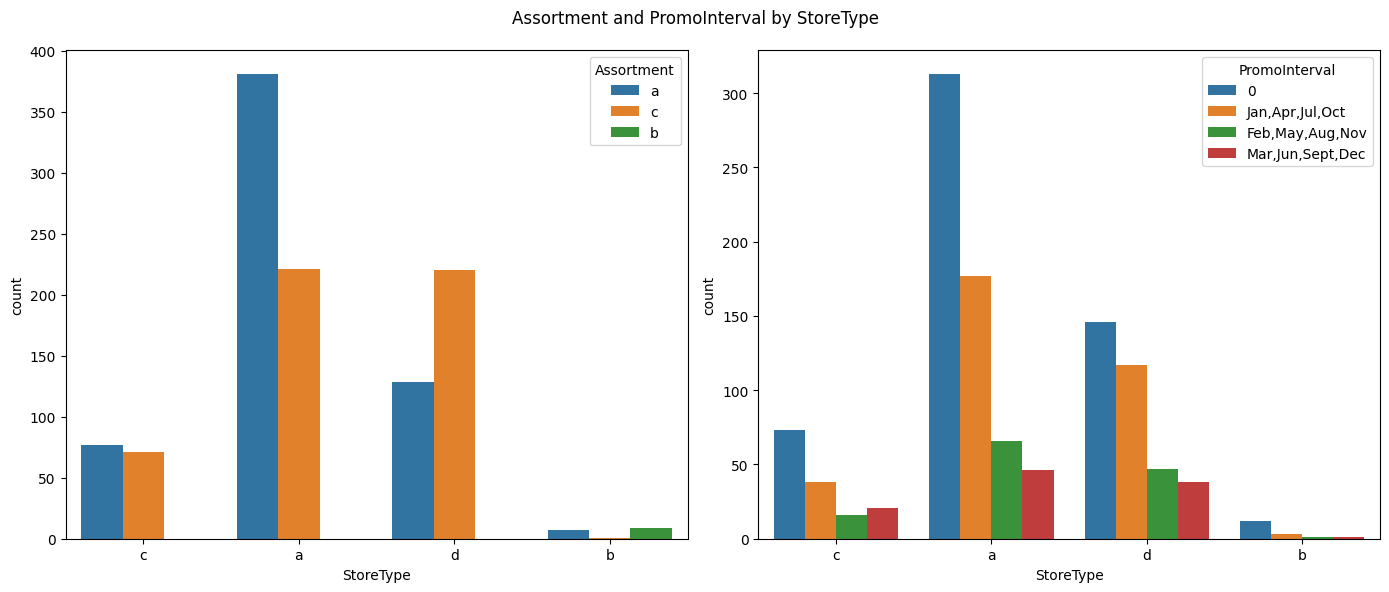

In [84]:
fig6, axes6 = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot(data=single_df, x='StoreType', hue='Assortment', ax=axes6[0])
sns.countplot(data=single_df, x='StoreType', hue='PromoInterval', ax=axes6[1])
fig6.suptitle('Assortment and PromoInterval by StoreType')
plt.tight_layout()
plt.show()

The left joint count plots show, as aforementioned, that StoreType `a` is the dominant class. Only stores of type `b` have all three assortment classes, whereas `a`, `d`, and `c` only have assortments `a` (basic), and `b` (extra).   

The right panel shows that most stores, especially of types **a** and **d**, are **not enrolled in continuous promotions (PromoInterval = 0)**. Among those that do participate, the **Jan,Apr,Jul,Oct** cycle is the most frequent. **Larger, higher-volume store types** dominate both in number and in participation across assortment levels and promotion schedules, while smaller store types contribute minimally to the overall distribution.

## StoreType, StateHoliday, SchoolHoliday, DayOfWeek, and Open

In [85]:
pd.crosstab(df['DayOfWeek'], df['Open'])

Open,0,1
DayOfWeek,,
1,7170,137560
2,1703,143961
3,3729,141936
4,11201,134644
5,7205,138640
6,672,144058
7,141137,3593


The crosstab between **DayOfWeek** and **Open** shows that stores are open on nearly all days except Sunday. From Monday to Saturday (Days 1–6), the number of open records consistently exceeds 134,000, with only a small fraction closed each day. On Sunday (Day 7), the pattern reverses. Around 141,000 closures versus only 3,593 openings, indicating that most stores close on Sundays. This indicates a strong weekly operating pattern: stores maintain regular activity throughout the week but largely suspend operations at the end of it.

In [86]:
pd.crosstab(df['StateHoliday'], df['SchoolHoliday'])

SchoolHoliday,0,1
StateHoliday,,
0,819949,166210
a,15055,5205
b,484,6206
c,0,4100


The crosstab compares **StateHoliday** and **SchoolHoliday**, showing that most records are of regular (non-holiday) days (StateHoliday = 0). Around 820,000 of these records occur outside school holidays and 166,000 during them, indicating that school holidays overlap with normal days more often than with official state holidays. The few instances of state holidays *a*, *b*, and *c* also coincide occasionally with school breaks, particularly *b* (≈6k cases), suggesting that while school holidays frequently align with standard days, they sometimes coincide with specific state events.

In [87]:
pd.crosstab(index=df['Open'], columns=[df['StoreType'], df['StateHoliday']])

StoreType          a                         b                     c        \
StateHoliday       0      a     b     c      0    a    b   c       0     a   
Open                                                                         
0              78141  10597  3576  2236    260    5    2   0   19845  2565   
1             456801    236    36     4  15112  285  100  66  112913    65   

StoreType                    d                    
StateHoliday    b    c       0     a     b     c  
Open                                              
0             888  564   44431  6399  2079  1229  
1               0    0  258656   108     9     1

The crosstab links **Store open status**, **StoreType**, and **StateHoliday**. Stores are mostly open on regular days (StateHoliday = 0), with over 450k open records for store type *a* and similar proportions for *c* and *d*. Closed counts are minimal and mainly tied to state holidays, especially *a* and *d*. This confirms that state holidays have a limited but visible effect on operations, with larger store types maintaining activity even on holiday periods.

In [88]:
pd.crosstab(index=df['Open'], columns=[df['StoreType'], df['SchoolHoliday']])

StoreType           a             b            c              d       
SchoolHoliday       0      1      0     1      0      1       0      1
Open                                                                  
0               84947   9603    229    38  21393   2469   47984   6154
1              368267  88810  12685  2878  90794  22184  209189  49585

The crosstab examines **Store open status**, **StoreType**, and **SchoolHoliday**. The pattern is similar: nearly all stores remain open during school holidays, though a small increase in closures appears across all store types when schools are on break. Type *a* stores dominate both open and closed counts, while types *b* and *c* have fewer total observations. Overall, school holidays exert only a minor influence on store closures.

## Holidays vs Sales and Customers

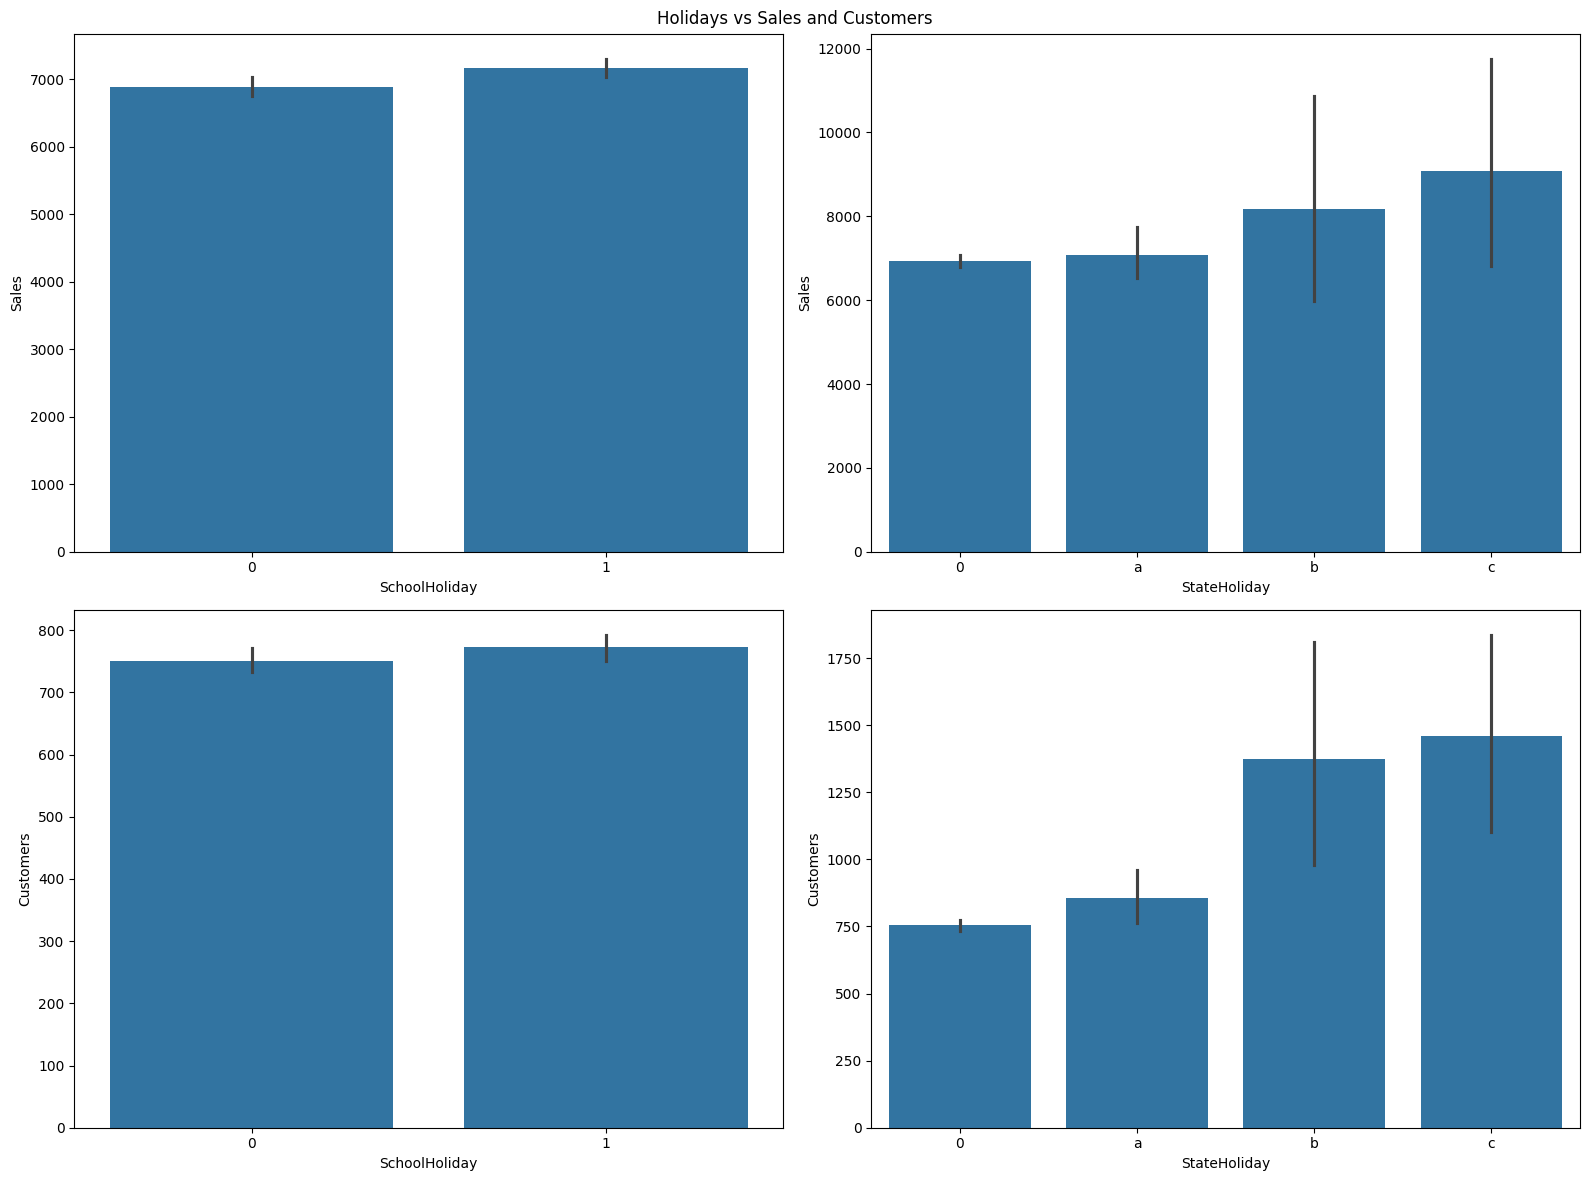

In [89]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
# Sales distributions, granted store is open
school_sales = open_df.groupby(['Store', 'SchoolHoliday'])['Sales'].mean().reset_index()
sns.barplot(data=school_sales, y='Sales', x='SchoolHoliday', ax=axes[0,0])
state_sales = open_df.groupby(['Store', 'StateHoliday'])['Sales'].mean().reset_index()
sns.barplot(data=state_sales, y='Sales', x='StateHoliday', ax=axes[0,1])

# Customer distributions, granted store is open
school_customers = open_df.groupby(['Store', 'SchoolHoliday'])['Customers'].mean().reset_index()
sns.barplot(data=school_customers, y='Customers', x='SchoolHoliday', ax=axes[1,0])
state_customers = open_df.groupby(['Store', 'StateHoliday'])['Customers'].mean().reset_index()
sns.barplot(data=state_customers, y='Customers', x='StateHoliday', ax=axes[1,1])
fig.suptitle("Holidays vs Sales and Customers")
plt.tight_layout()
plt.show()

The bar plots compare mean **Sales** and **Customers** across **SchoolHoliday** and **StateHoliday** categories.  

For **SchoolHoliday**, both sales and customer counts show only slight increases during school breaks, suggesting minimal impact. Stores perform nearly the same whether schools are open or closed, implying that routine shopping patterns are stable year-round.  

For **StateHoliday**, variability is higher. Note that these are of the few records that the stores are open on these holidays, a significantly smaller number of records than those of when they are closed. Sales and customer averages tend to rise on official holidays, particularly categories *b* and *c*, which show larger means and higher error bars, indicating strong but inconsistent effects. This pattern suggests that while most holidays slightly boost activity, certain state holidays can cause notable spikes, possibly linked to special events or increased leisure shopping.

## Promotions vs Sales and Customers

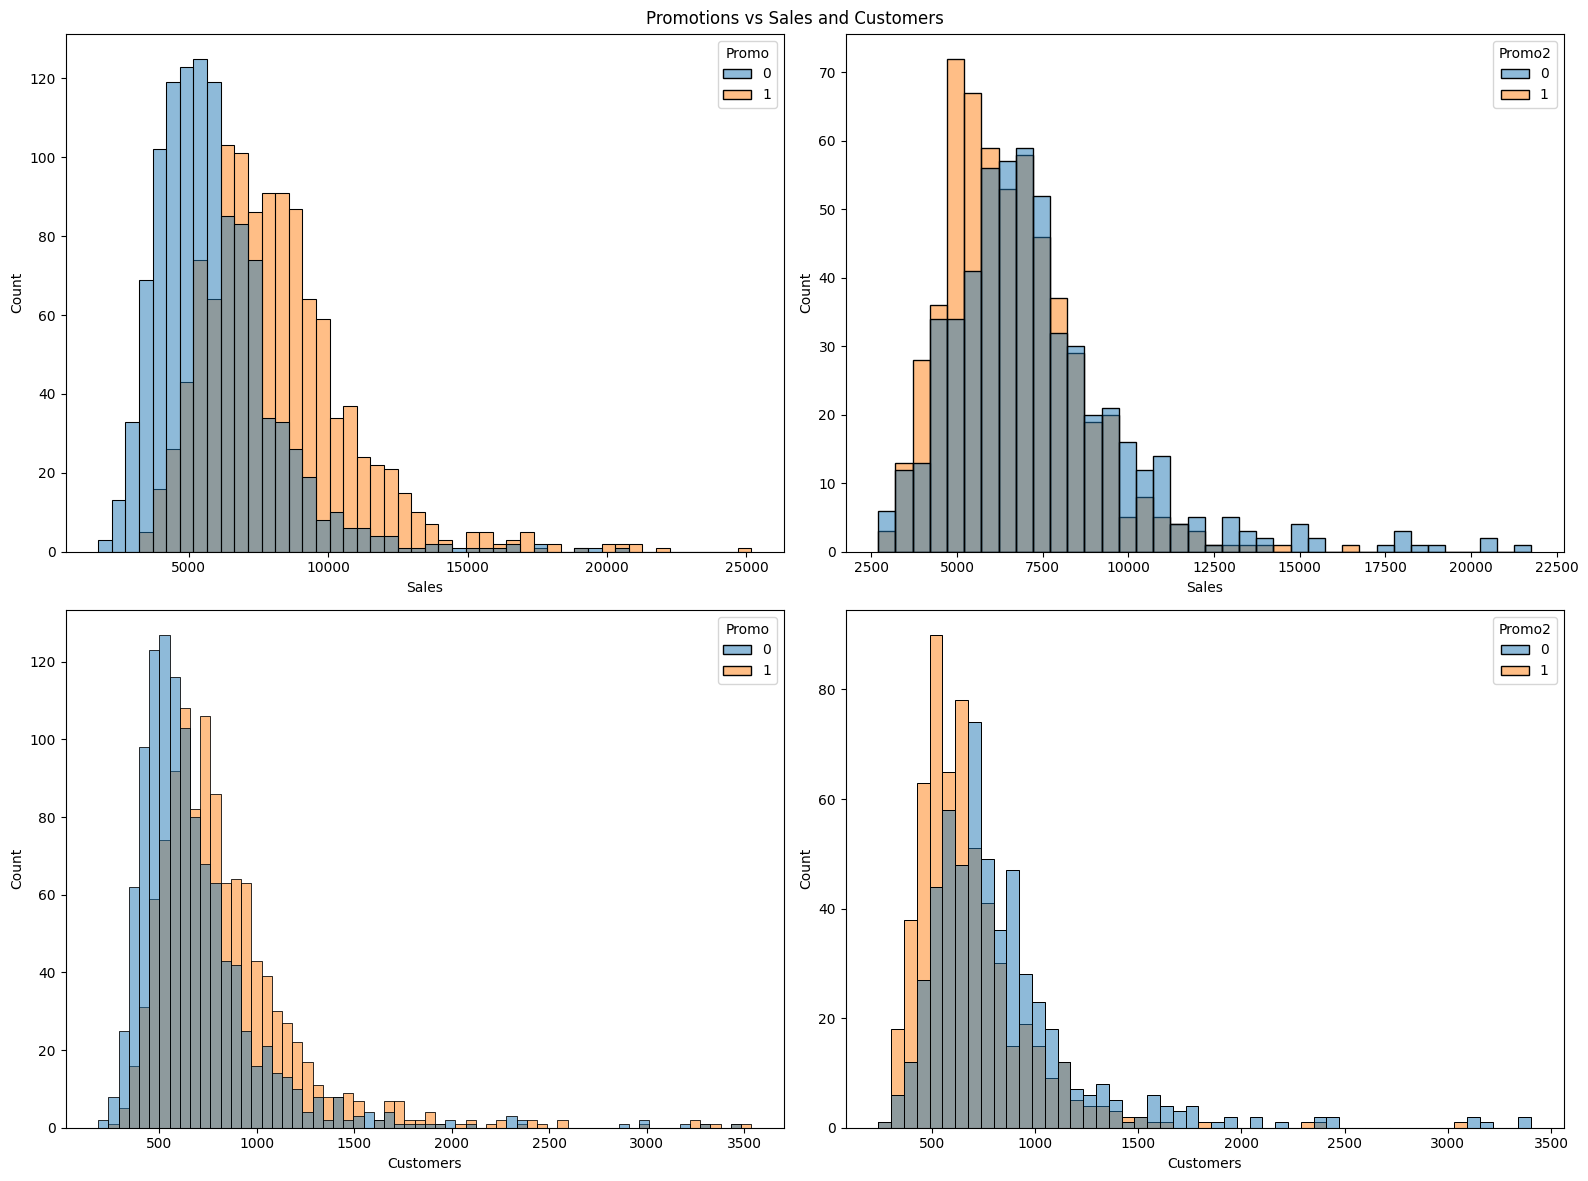

In [90]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
# Sales distributions
promo_sales = open_df.groupby(['Store', 'Promo'])['Sales'].mean().reset_index()
sns.histplot(data=promo_sales, x='Sales', hue='Promo', ax=axes[0,0])
promo2_sales = open_df.groupby(['Store', 'Promo2'])['Sales'].mean().reset_index()
sns.histplot(data=promo2_sales, x='Sales', hue='Promo2', ax=axes[0,1])
# Customer distributions
promo_customers = open_df.groupby(['Store', 'Promo'])['Customers'].mean().reset_index()
sns.histplot(data=promo_customers, x='Customers', hue='Promo', ax=axes[1,0])
promo2_customers = open_df.groupby(['Store', 'Promo2'])['Customers'].mean().reset_index()
sns.histplot(data=promo2_customers, x='Customers', hue='Promo2', ax=axes[1,1])
fig.suptitle("Promotions vs Sales and Customers")
plt.tight_layout()
plt.show()

The histograms compare the distributions of **Sales** and **Customers** under promotion conditions.  

For **Promo (left column)**, both sales and customer distributions shift noticeably to the right when promotions are active, indicating higher averages and a wider spread. The promotional days produce more high-value observations, with the density peak moving from around 5,000 to roughly 7,000 in sales and from about 500 to 800 in customer counts. This confirms that short-term promotions effectively boost both traffic and revenue.  

For **Promo2 (right column)**, the pattern differs. Stores under continuous promotion tend to have **lower overall sales and customer counts**, with the orange peaks appearing at smaller values. This suggests that while short-term promos create strong immediate lifts, long-running campaigns may lose impact over time or attract steadier but smaller sales volumes. Overall, **Promo** drives clear short-term performance gains, whereas **Promo2** appears associated with more moderate, sustained activity.


## StoreType and Assortment vs Sales and Customers

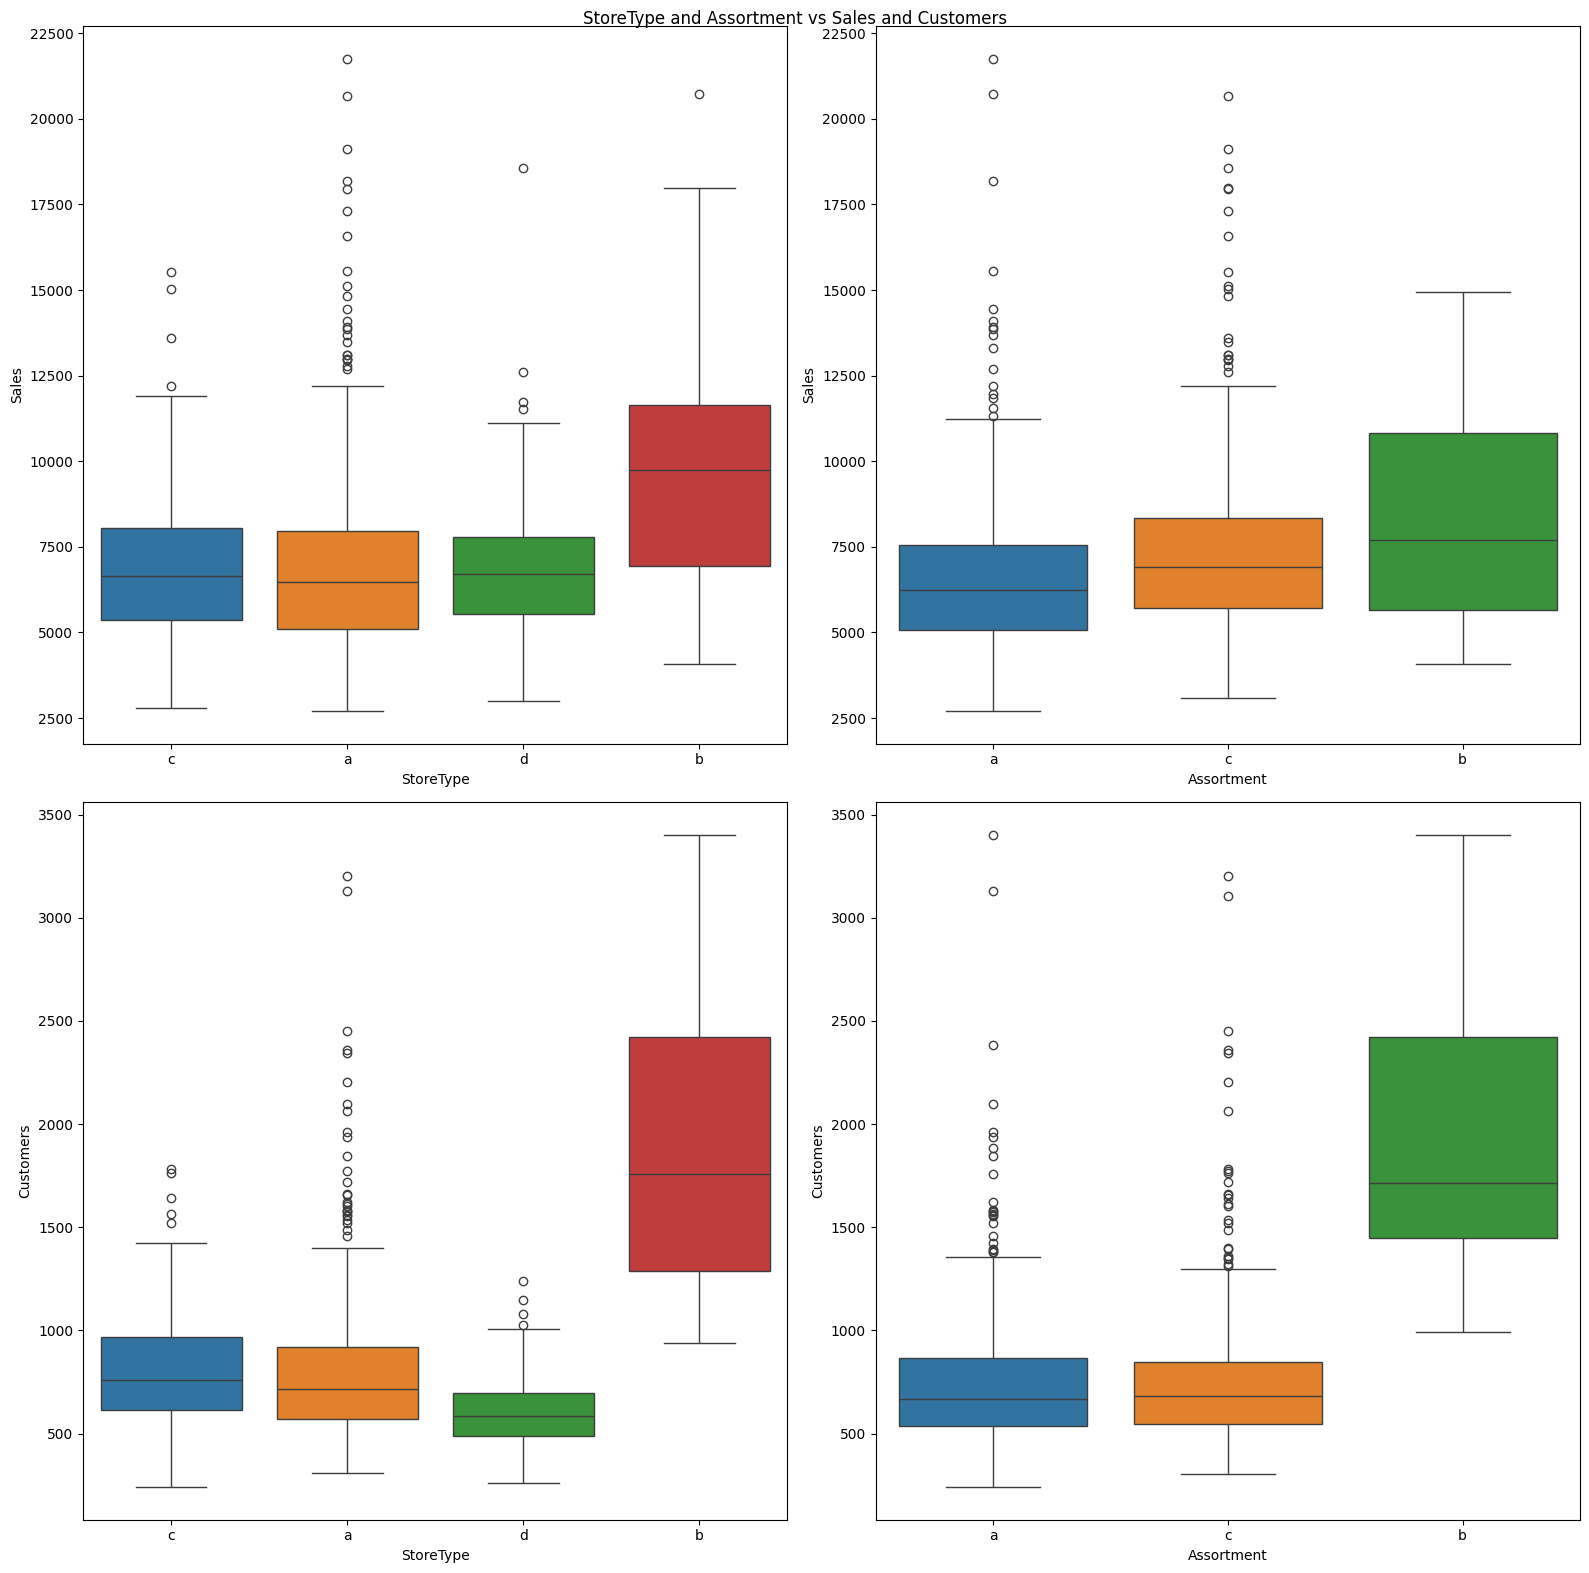

In [91]:
open_df = df[df['Open'] != 0]
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
# Sales distributions
store_type_sales = open_df.groupby(['Store', 'StoreType'])['Sales'].mean().reset_index()
sns.boxplot(data=store_type_sales, y='Sales', x='StoreType', hue='StoreType', ax=axes[0,0])
assortment_sales = open_df.groupby(['Store', 'Assortment'])['Sales'].mean().reset_index()
sns.boxplot(data=assortment_sales, y='Sales', x='Assortment', hue='Assortment', ax=axes[0,1])

store_type_customers = open_df.groupby(['Store', 'StoreType'])['Customers'].mean().reset_index()
sns.boxplot(data=store_type_customers, y='Customers', x='StoreType',hue='StoreType', ax=axes[1,0])
assortment_customers = open_df.groupby(['Store', 'Assortment'])['Customers'].mean().reset_index()
sns.boxplot(data=assortment_customers, y='Customers', x='Assortment', hue='Assortment', ax=axes[1,1])
fig.suptitle("StoreType and Assortment vs Sales and Customers")
plt.tight_layout()
plt.show()

The boxplots show how **Sales** and **Customers** vary across **StoreType** and **Assortment** categories.  

For **StoreType**, type *b* stands out with the highest median sales and customer counts, along with the widest range and many high-value outliers. This suggests that type *b* stores serve larger markets or operate at higher capacity. Types *a*, *c*, and *d* have similar medians, though *a* shows more outliers, indicating greater variability in performance among its stores.  

For **Assortment**, type *b* again leads in both sales and customers, with a visibly higher median and broader spread. Types *a* and *c* have comparable distributions but lower overall performance. The results imply that stores offering **assortment b (extended range)** attract more customers and generate higher sales, reflecting the advantage of broader product availability and stronger consumer draw.

## Correlation Heatmap

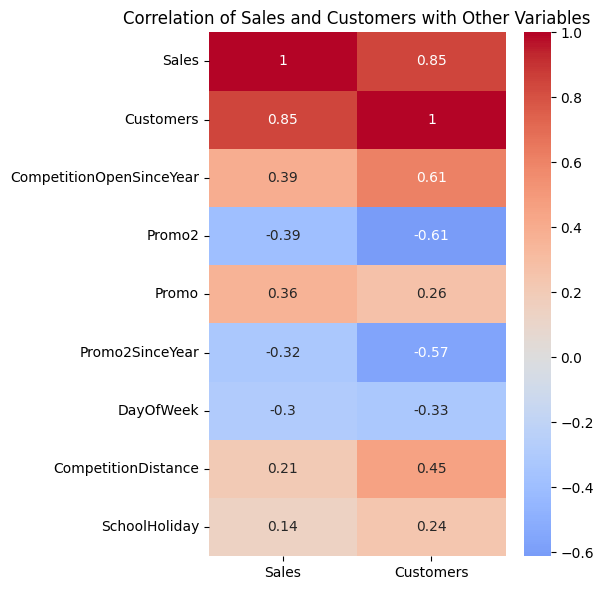

In [92]:
num_df = indexed_df.drop(columns=['Open', 'index', 'Store', 'CompetitionOpenSinceMonth', 'Promo2SinceWeek']).select_dtypes(include='number')
num_df = num_df.resample('ME').mean()
# --- Correlations with Sales and Customers ---
corr = num_df.corr(method='spearman')[['Sales', 'Customers']].sort_index()
corr = corr.reindex(corr['Sales'].abs().sort_values(ascending=False).index)

# --- Plot heatmap ---
plt.figure(figsize=(6, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation of Sales and Customers with Other Variables")
plt.tight_layout()
plt.show()

The numerical features of the dataframe indexed by date were selected, and aggregated into monthly averages. Their spearman-rho correlation coefficient against the performance indicators Sales and Customers were taken, and visualized in the heatmap above.

The high positive correlation (≈0.85) between Sales and Customers confirms that stores with more customers also achieve higher sales, a consistent monotonic relationship across months. Features like `CompetitionOpenSinceYear` display moderate positive correlations with both metrics, likely because older stores or those with long-established competitors tend to have higher baseline activity and more stable customer flow. Conversely, variables such as `Promo2` and `Promo2SinceYear` show negative correlations, suggesting that stores enrolled in or recently introduced to the second promotion program generally rank lower in both sales and customer volume, possibly reflecting newer or less mature stores. `Promo` itself correlates weakly positively with Sales, implying that promotional activity modestly increases revenue, while `DayOfWeek` and `CompetitionDistance` have weaker effects, indicating only limited monotonic influence on monthly averages. Overall, the heatmap derived from the code highlights how, over time, structural and promotional variables co-move with Sales and Customers, but because these correlations are computed on monthly means, they mainly capture long-term patterns rather than daily or causal effects.


# Timeseries Analysis

## DayOfWeek vs Mean Sales by StoreType and Assortment

In [93]:
daily_means = (
    indexed_df
    .groupby(["DayOfWeek", "StoreType", "Assortment"], as_index=False)["Sales"]
    .mean()
)

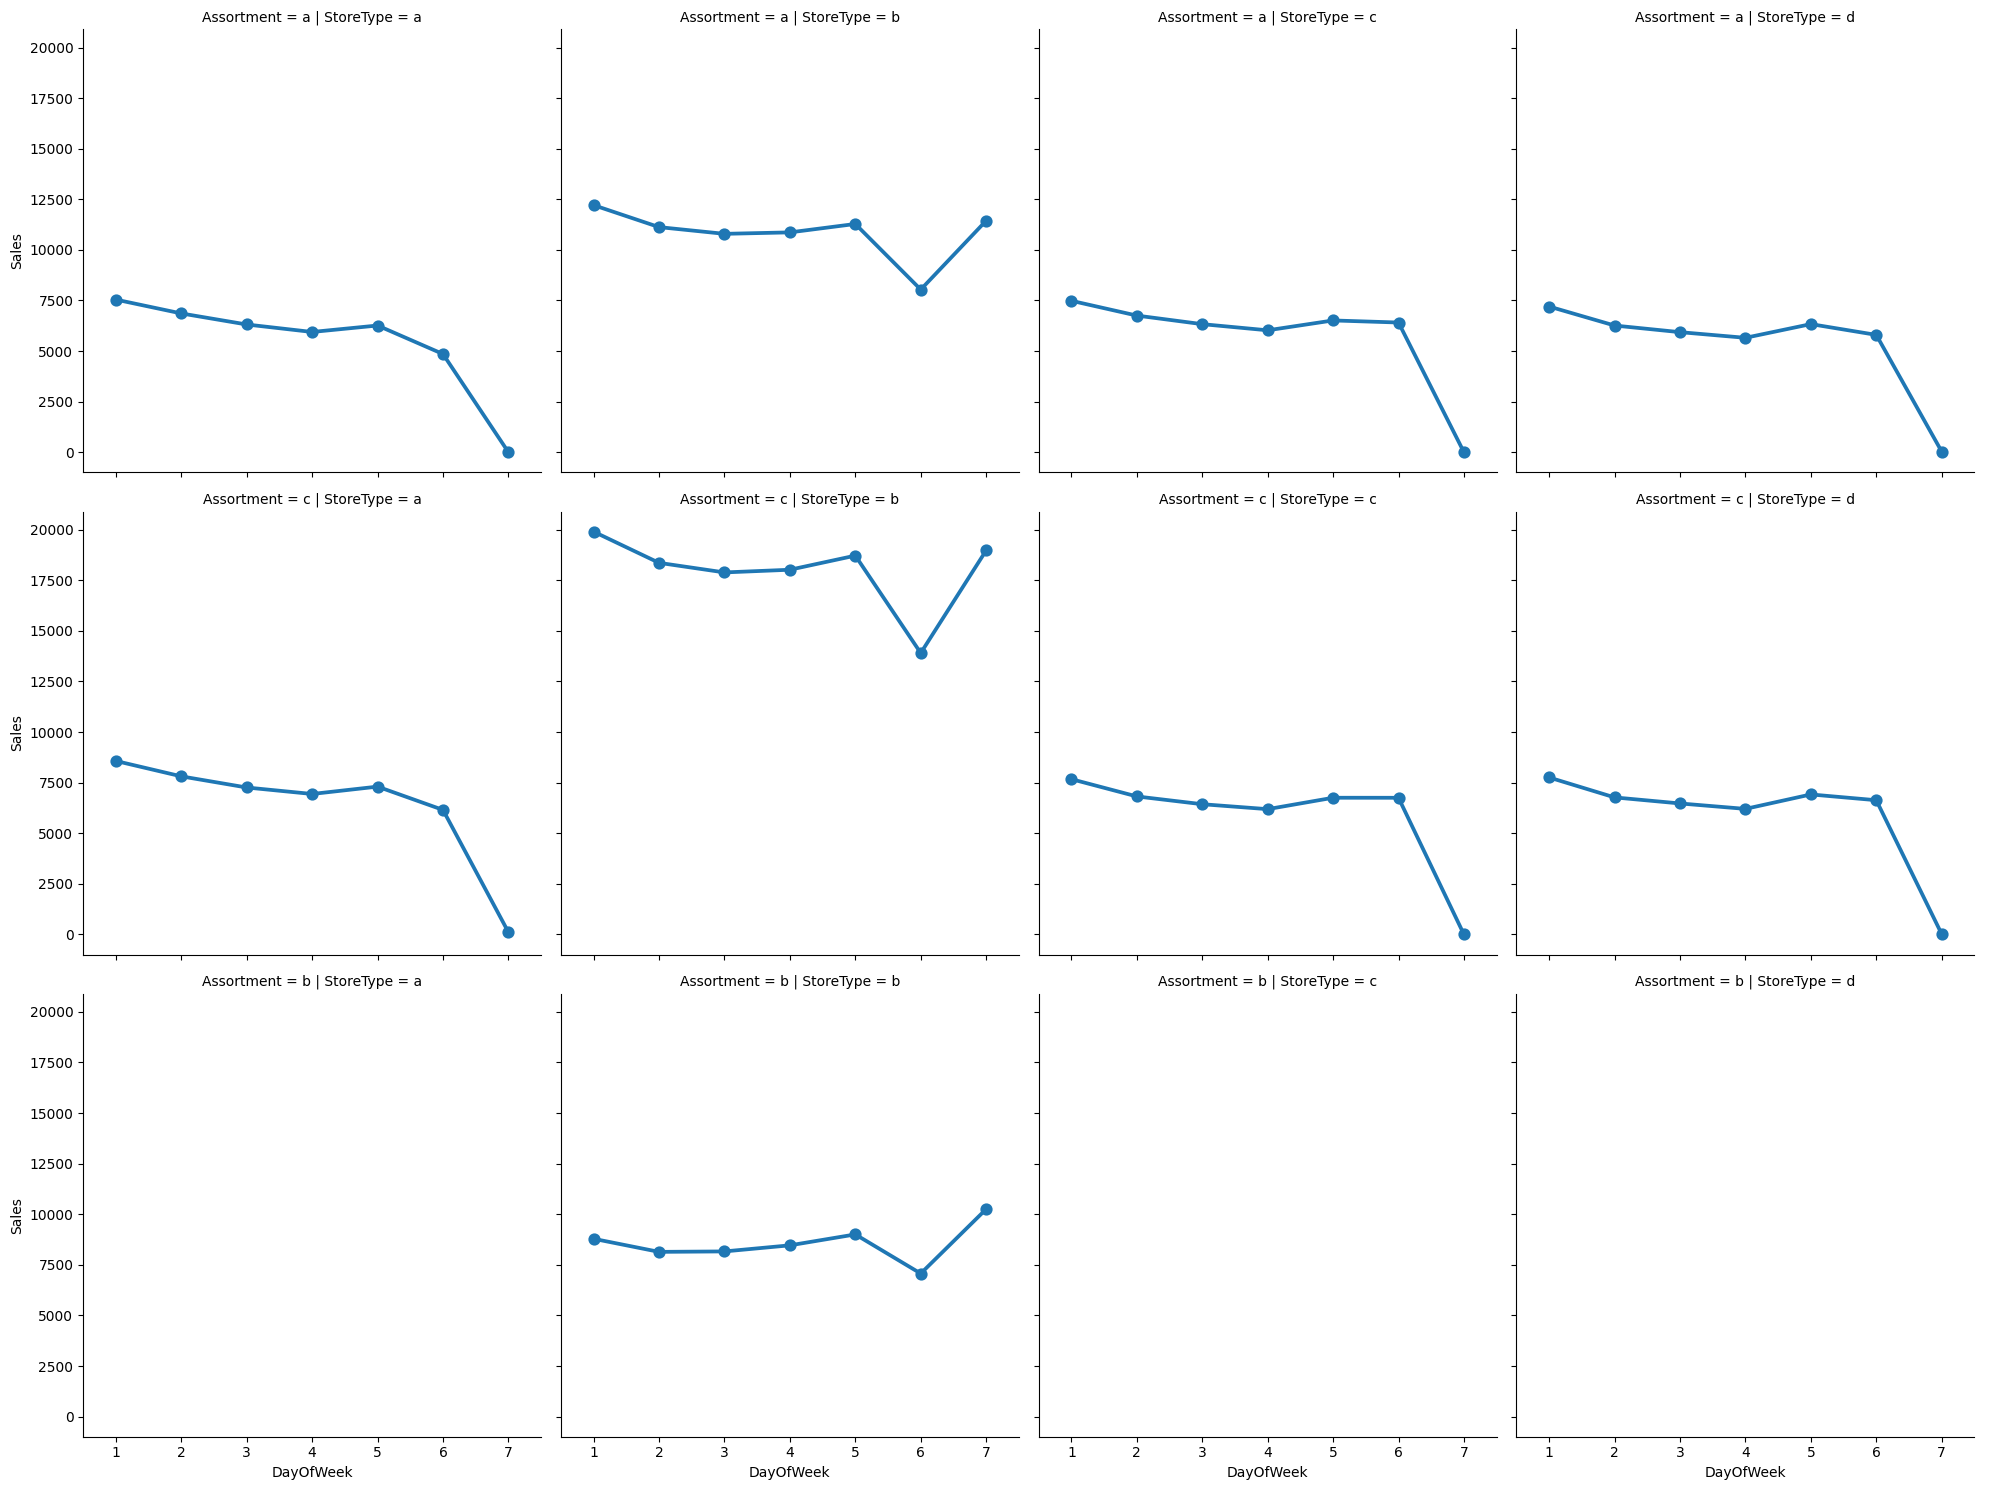

In [94]:
sns.catplot(
    data=daily_means, 
    x="DayOfWeek", 
    y="Sales", 
    kind="point", 
    col="StoreType",
    row="Assortment"
)


The line plots show how **average Sales** vary by **DayOfWeek** for each combination of **StoreType** and **Assortment**.  

Across nearly all panels, sales follow a similar weekly pattern—**strongest at the start of the week (Day 1)** and gradually declining toward **Day 6**, with a sharp drop on **Day 7 (Sunday)** when most stores are closed. The decline is especially steep for stores with *assortment a* and *c*, indicating that these formats rely heavily on weekday traffic.  

**StoreType b** consistently records the highest sales levels across all assortment types, often exceeding 15,000 early in the week, showing that these stores capture strong weekday demand. **StoreTypes a, c, and d** display lower and more stable sales, with limited variation through midweek.  

Overall, sales intensity is shaped more by the **store type** than by the **assortment**, and the clear downward slope toward the weekend highlights the weekday-centric nature of customer activity.

## Monthly Average Sales by PromoInterval and StoreType

In [95]:
indexed_df["PromoInterval"] = indexed_df["PromoInterval"].fillna("0")
promo_interval_means = (
    indexed_df
    .groupby([pd.Grouper(freq="MS"), "StoreType", "PromoInterval"])["Sales"]
    .mean()
    .reset_index()
)

In [96]:
promo_interval_means = promo_interval_means.rename(columns={"Date": "Month"})
promo_interval_means["Month"] = (
    pd.to_datetime(promo_interval_means["Month"])
      .dt.to_period("M")
      .dt.to_timestamp("M")
)

# enforce chronological x order
month_order = promo_interval_means["Month"].sort_values().unique()

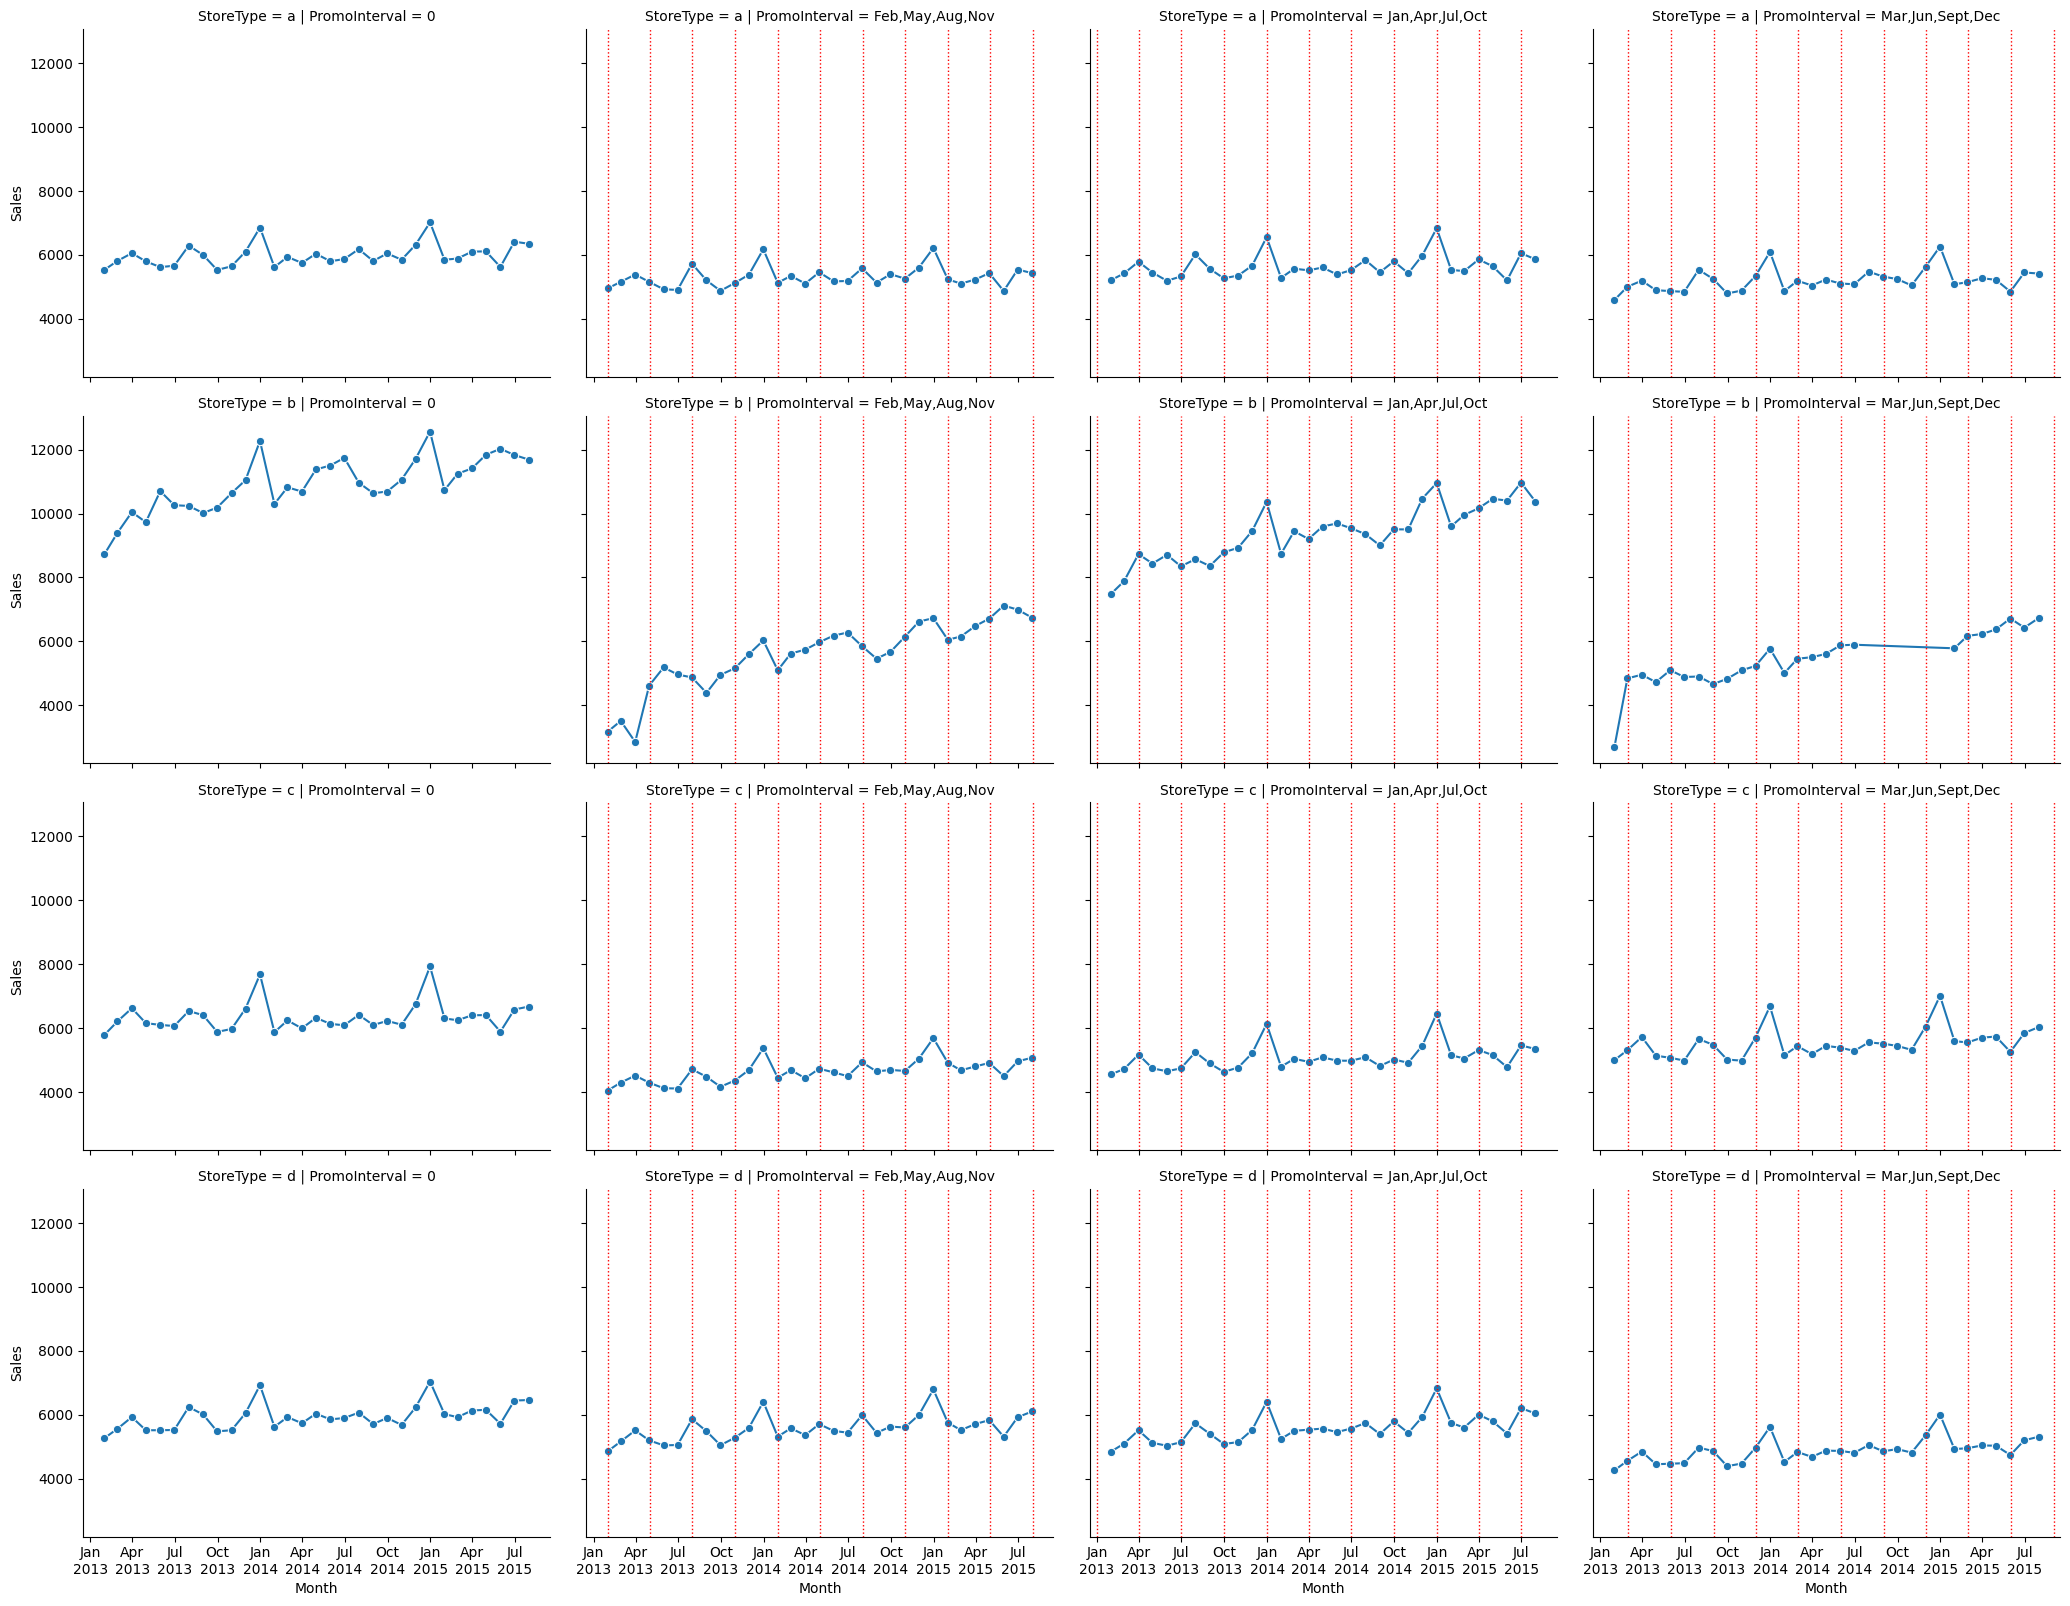

In [97]:
import matplotlib.dates as mdates
g = sns.relplot(
    data=promo_interval_means,
    x="Month", y="Sales",
    kind="line",
    marker="o",
    row="StoreType", col="PromoInterval",
    height=4, aspect=1.3
)


vlines = {
    "Jan,Apr,Jul,Oct": ["2013-01-01", "2013-04-01", "2013-07-01", "2013-10-01", 
                        "2014-01-01", "2014-04-01", "2014-07-01", "2014-10-01", 
                        "2015-01-01", "2015-04-01", "2015-07-01"],
    "Feb,May,Aug,Nov": ["2013-02-01", "2013-05-01", "2013-08-01", "2013-11-01", 
                        "2014-02-01", "2014-05-01", "2014-08-01", "2014-11-01", 
                        "2015-02-01", "2015-05-01", "2015-08-01"],
    "Mar,Jun,Sept,Dec": ["2013-03-01", "2013-06-01", "2013-09-01", "2013-12-01", 
                        "2014-03-01", "2014-06-01", "2014-09-01", "2014-12-01", 
                        "2015-03-01", "2015-06-01", "2015-09-01"]
}

# iterate by column index instead of per-axes flatten
for col_idx, col_val in enumerate(g.col_names):
    if col_val in vlines:
        for x_date in vlines[col_val]:
            for row_idx in range(len(g.row_names)):
                ax = g.axes[row_idx, col_idx]
                ax.axvline(
                    pd.to_datetime(x_date),
                    color="red",
                    linestyle=":",
                    linewidth=1
                )
                ax.xaxis.set_major_formatter(mdates.DateFormatter("%b\n%Y"))


The plots show **monthly average sales trends** from 2013 to 2015 across **StoreType** and **PromoInterval** categories.  

For stores with **no continuous promotion (PromoInterval = 0)**, sales remain relatively stable through time, showing only minor fluctuations without clear upward or seasonal patterns.  

The continuous promotions do not actually appear more effective in driving sales upwards. The plots show that sales often flatten or dip around the vertical promotion lines, suggesting that these months do not produce strong spikes in activity. While store type b maintains the highest sales overall, even its lines show limited increases during the scheduled intervals. Continuous promotions therefore seem to help sustain steady sales levels rather than generate noticeable short-term gains, indicating diminishing returns from repeated Promo2 cycles.

In [98]:
weekly_sales = indexed_df['Sales'].resample('W').sum()

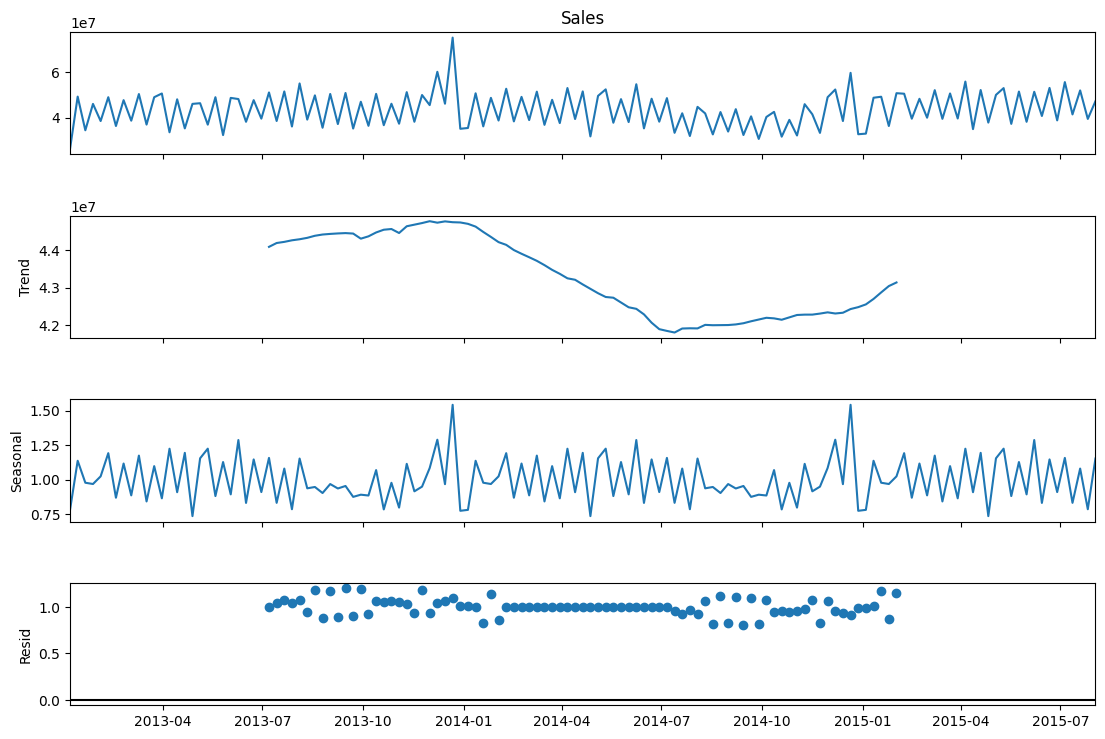

In [99]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(weekly_sales, model='multiplicative', period=52)

fig = result.plot()
fig.set_size_inches(12, 8)  # enlarge figure
plt.show()

The seasonal decomposition of weekly sales reveals four key patterns:

1. **Observed series:** Total sales show strong regular fluctuations with clear weekly cycles and occasional sharp peaks, particularly around late 2013 and early 2015, which likely correspond to major promotions or holiday periods.

2. **Trend component:** The long-term trend rises gradually through most of 2013, peaks in early 2014, and then declines steadily into mid-2014 before slightly recovering in 2015. This indicates an overall slowdown in sales momentum after an initial growth phase.

3. **Seasonal component:** The repeating oscillations confirm strong seasonality, with sales regularly rising and falling within each yearly cycle. A large seasonal spike near the end of 2013 supports the presence of holiday-driven demand patterns.

4. **Residuals:** The residuals are small and relatively stable, meaning that most variation in sales is explained by the trend and seasonal components. Only a few weeks show large deviations, likely corresponding to unusual promotional events or external shocks.

In summary, sales display a clear yearly seasonality and a moderate long-term decline after early 2014, with only minor irregular variations outside the expected seasonal pattern.


# Competition Analysis

## New Competition

To analyze the effect of the appearance of new competition to the performance of a store, a slice of the dataset was taken for stores whose competition's opening date fell within a year after the start of the data and a year before the end of the data.

These stores' mean daily sales for the year before and the year after are then sampled and analyzed.

In [100]:
from dateutil.relativedelta import relativedelta
# ensure proper dtype
indexed_df['CompOpenDate'] = pd.to_datetime(indexed_df['CompOpenDate'], errors='coerce')

# filter by range
comp_df = indexed_df[
    (indexed_df['CompOpenDate'] > pd.Timestamp(date(2014, 1, 1))) &
    (indexed_df['CompOpenDate'] < pd.Timestamp(date(2014, 7, 31)))
]

In [101]:
new_comp_stores = comp_df['Store'].unique()
print(new_comp_stores)

[ 369  361  386  336  318  416  488  423   30   14   57   52   45  213
  275  270  268  266  264  169  166  189  947  905  901 1111  983 1019
  653  635  629  683  677  585  601  604  800  715  740]


Above are the Stores that fall within the aforementioned criteria.

In [102]:
comp_distances = []
mean_before = []
mean_after = []
mean_all_time = []
for store in new_comp_stores:
    comp_open = comp_df.loc[comp_df['Store'] == store, 'CompOpenDate'].iloc[0]

    prev_year = comp_df.loc[
        (comp_df['Store'] == store) &
        (comp_df.index >= comp_open - relativedelta(years=1)) &
        (comp_df.index <= comp_open)
    ]['Sales'].mean()

    year_after = comp_df.loc[
        (comp_df['Store'] == store) &
        (comp_df.index >= comp_open) &
        (comp_df.index <= comp_open + relativedelta(years=1))
    ]['Sales'].mean()

    mean_at = comp_df.loc[comp_df['Store'] == store, 'Sales'].mean()
    comp_distances.append(single_df.loc[single_df['Store'] == store, 'CompetitionDistance'].values[0])
    mean_before.append(prev_year)
    mean_after.append(year_after)


Store-level mean sales for the year before competition's open, year after, the delta between those years' sales, and competition distance are recorded for each store in new_comp_stores

In [103]:
from scipy.stats import shapiro

stat, p = shapiro(mean_before)
if p > 0.05:
    print("Mean Sales from the year before competition's open are Normally distributed.")
else:
    print("Mean Sales from the year before competition's open are not Normally distributed.")
print(f"p = {p}")

Mean Sales from the year before competition's open are Normally distributed.
p = 0.08180431887654807


In [104]:
stat, p = shapiro(mean_after)
if p > 0.05:
    print(f"Mean Sales from the year after competition's open are Normally distributed")
else:
    print("Mean Sales from the year after competition's open are not Normally distributed.")
print(f"p = {p}")

Mean Sales from the year after competition's open are not Normally distributed.
p = 0.0032273573007071026


In [105]:
from scipy.stats import wilcoxon
diff = np.array(mean_after) - np.array(mean_before)
stat, p = wilcoxon(mean_before, mean_after)

if p < 0.05:
    direction = "increased" if np.mean(diff) > 0 else "decreased"
    print(f"Reject H0 (Statistically Significant Difference), values {direction}")
else:
    print("Fail to reject H0 (No Statistically Significant Difference)")
print(f"p = {p}")

Reject H0 (Statistically Significant Difference), values decreased
p = 8.473593697999604e-05


The Wilcoxon signed-rank test shows a **statistically significant difference** between mean store-level sales before and after the event (*p* = 8.47e⁻05). Because the mean difference is negative, **sales significantly decreased after the event**. This suggests that the event had a measurable adverse impact on store performance, reducing average sales across locations.

In [106]:
stat, p = shapiro(diff)
if p > 0.05:
    print("Differences between means are normally distributed")
else:
    print("Differences between means are not normally distributed")
print(f"p = {p}")

Differences between means are not normally distributed
p = 0.04624139034478223


In [107]:
stat, p = shapiro(comp_distances)
if p > 0.05:
    print("Store distances to competition are normally distributed")
else:
    print("Store distances to competition are not normally distributed")
print(f"p = {p}")

Store distances to competition are not normally distributed
p = 1.1073810920107956e-08


In [108]:
from scipy.stats import spearmanr

rho, p = spearmanr(comp_distances, diff)
print(f"Spearman’s rho = {rho:.3f}, p = {p:.3f}")

if p < 0.05:
    if rho > 0:
        print("Significant positive relationship. Sales increase as distance increases.")
    else:
        print("Significant negative relationship. Sales decrease as distance increases.")
else:
    print("No significant monotonic relationship between distance and sales.")


Spearman’s rho = 0.603, p = 0.000
Significant positive relationship. Sales increase as distance increases.


The Spearman rank correlation test shows a **statistically significant positive relationship** between competition distance and the change in mean sales (*ρ* = 0.603, *p* < 0.001). This indicates that stores located **farther from competitors experienced greater increases in sales**, while those closer to competitors tended to perform worse after the event. The relationship is monotonic and moderately strong, suggesting that competitive proximity plays an important role in store sales performance.

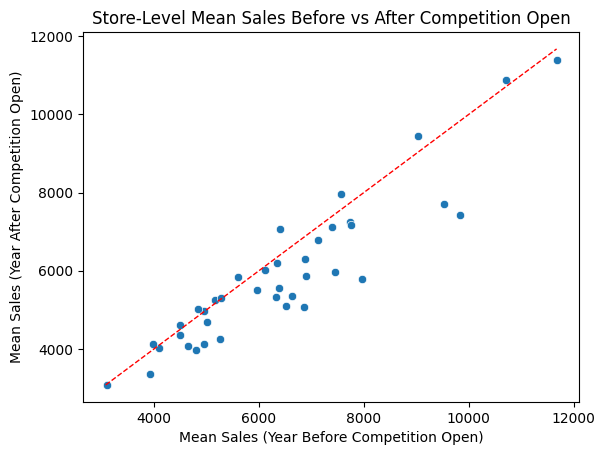

In [109]:
sns.scatterplot(x=mean_before, y=mean_after)
lims = [
    min(min(mean_before), min(mean_after)),
    max(max(mean_before), max(mean_after))
]
plt.plot(lims, lims, 'r--', linewidth=1)  # red dashed diagonal
plt.xlabel("Mean Sales (Year Before Competition Open)")
plt.ylabel("Mean Sales (Year After Competition Open)")
plt.title("Store-Level Mean Sales Before vs After Competition Open")
plt.show()

The scatter plot compares **store-level mean sales before and after the opening of nearby competitors**. Most points lie **below the red x = y line**, indicating that for many stores, mean sales **declined after competitors opened**. A few stores remain near or above the line, suggesting relatively stable or improved performance, but the overall pattern shows a downward shift. This visual trend supports the statistical result that the competition opening was associated with a **significant reduction in average store sales**.

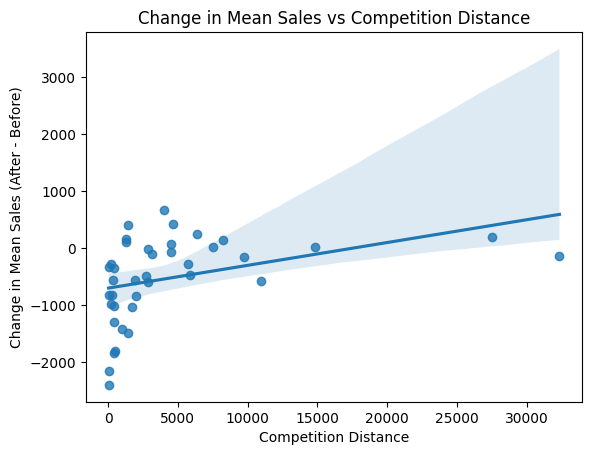

In [110]:
sns.regplot(x=comp_distances, y=diff)
plt.title("Change in Mean Sales vs Competition Distance")
plt.xlabel("Competition Distance")
plt.ylabel("Change in Mean Sales (After - Before)")
plt.show()

The regression plot shows the relationship between **competition distance** and the **change in store-level mean sales** after competitors opened.  
The upward slope indicates a **positive relationship** — stores located **farther from competitors tend to experience smaller declines or even slight gains in sales**, while those **closer to competitors show larger decreases**.  
The wide confidence interval suggests variability across stores, but the general trend supports the idea that **proximity to new competitors negatively impacts sales performance**.

## Long Term Competition

A similar analysis between CompetitionDistance and Mean Sales all throughout the recorded data is performed to determine whether the correlation persists in the long term.

In [111]:
# Group by Store and StoreType
grouped = (
    indexed_df
    .groupby(['Store', 'StoreType'], as_index=False)
    .agg({'Sales': 'mean', 'CompetitionDistance': 'first'})
)

# Filter out invalid or missing distances
grouped = grouped[grouped['CompetitionDistance'].notna() & (grouped['CompetitionDistance'] > 0)]

# Separate lists (if still needed)
mean_sales = grouped['Sales'].tolist()
comp_distances_all = grouped['CompetitionDistance'].tolist()

In [112]:
stat, p = shapiro(comp_distances_all)
if p > 0.05:
    print("Store distances to competition are normally distributed")
else:
    print("Store distances to competition are not normally distributed")

Store distances to competition are not normally distributed


In [113]:
results = []

for stype, group in grouped.groupby('StoreType'):
    rho, p = spearmanr(group['CompetitionDistance'], group['Sales'])
    
    if p < 0.05:
        direction = "positive" if rho > 0 else "negative"
        result = f"StoreType {stype}: Significant {direction} relationship (rho = {rho:.3f}, p = {p:.3f})"
    else:
        result = f"StoreType {stype}: No significant relationship (rho = {rho:.3f}, p = {p:.3f})"
    
    print(result)
    results.append((stype, rho, p))


StoreType a: No significant relationship (rho = -0.075, p = 0.068)
StoreType b: No significant relationship (rho = -0.309, p = 0.228)
StoreType c: No significant relationship (rho = -0.003, p = 0.973)
StoreType d: No significant relationship (rho = 0.067, p = 0.211)


The Spearman correlation results show **no statistically significant monotonic relationship** between competition distance and mean sales for any store type.  

Overall, these results indicate that **competition distance does not have a consistent or significant influence on mean store sales** across any store category in the long term. Reconciling this with the previous test, ***the more important factor on performance is the presence of competition.***

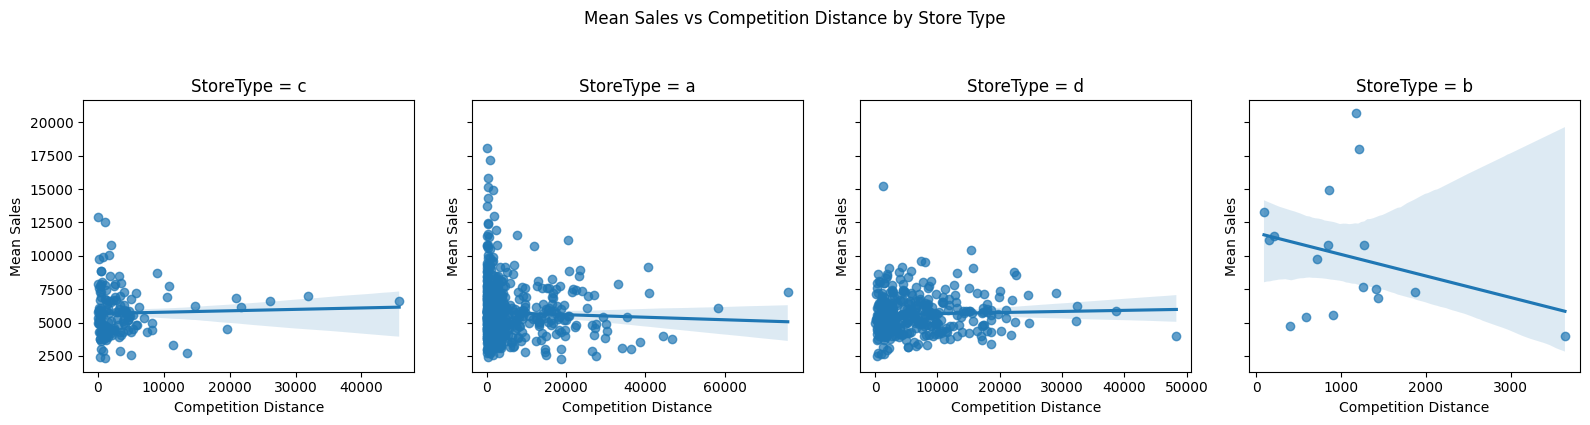

In [114]:
store_types = grouped['StoreType'].unique()
fig, axes = plt.subplots(1, 4, figsize=(16, 4), sharey=True)

for ax, stype in zip(axes, store_types):
    subset = grouped[grouped['StoreType'] == stype]
    sns.regplot(
        data=subset,
        x='CompetitionDistance',
        y='Sales',
        ax=ax,
        scatter_kws={'alpha': 0.7}
    )
    ax.set_title(f"StoreType = {stype}")
    ax.set_xlabel("Competition Distance")
    ax.set_ylabel("Mean Sales")

fig.suptitle("Mean Sales vs Competition Distance by Store Type", y=1.05)
plt.tight_layout()
plt.show()

The regression plots illustrate the relationship between **competition distance** and **mean sales** across store types.  
All store types show flat or weakly sloped regression lines, confirming the statistical results that the relationship is **not significant**.  

For **StoreTypes a**, **c**, and **d**, the lines are nearly horizontal, indicating that changes in competitor distance have little to no effect on average sales levels.  
**StoreType b** displays a slightly negative slope, suggesting that stores closer to competitors may perform marginally better, but the pattern is unstable due to the small sample size and wide confidence band.  

Overall, the plots reinforce that **competition distance does not meaningfully influence mean sales**, and sales variability within each store type is likely driven by other factors such as promotions, assortment, or location characteristics.

# Conclusion
Sales are right-skewed, concentrated around 5,000–10,000 per open day, and move closely with customer counts, which are likewise right-skewed and typically below 1,000 per day. This establishes customers as a primary driver of revenue. Overall series show clear yearly seasonality and a mild post-2014 decline.

Short-term promos work. When Promo=1, both sales and customers shift right with higher averages. Continuous Promo2 is weaker and often associates with lower levels, suggesting fatigue or a steadier but smaller baseline.

Promo cadence is selective. About half of stores have no Promo2 cycle; among participants the “Jan,Apr,Jul,Oct” schedule dominates. Continuous-promo participation is uneven across formats, with larger types adopting more; many stores, especially types a and d, remain off-cycle.

Formats and assortment matter. StoreType b posts the highest medians and widest upper tail for both sales and customers; types a, c, d are lower and tighter. Assortment b (extra) leads, while a and c trail. These patterns imply scale and breadth drive throughput.

New-competition analysis sampled stores whose competitors opened within a defined window and compared mean daily sales one year before vs one year after opening. The regression indicates a positive slope: greater competitor distance aligns with smaller post-entry declines, while nearby competition relates to larger drops, though effects vary across stores. Treat this as exploratory. The long-horizon correlations of CompetitionDistance with mean sales fail to reject the null across all store types, so there is no statistically significant monotonic relationship in the aggregate.

# Recommendations

## 1. Apply Seasonal Forecast in Operations

The analysis shows strong yearly seasonality in store sales, indicating that demand forecasting can be directly integrated into operational planning. They can use predictive models to anticipate high and low demand periods at the store level, thus Rossmann can optimize inventory replenishment, staffing, and purchasing schedules instead of relying on static historical averages. This potential can help the company to reduce stockouts, avoid excess inventory accumulation, and align labor hours more efficiently with expected foot traffic, resulting in lower operational waste and better customer service.

## 2. Promotional Strategy

Findings show that short-term promotional campaigns reliably increase both sales and customer volume, but repeated and poorly timed promotions lead to diminishing returns—an effect often referred to as “promo fatigue.” Rather than continuing broad, fixed-frequency promotions, Rossmann can improve profitability by tailoring discount depth, duration, and targeting to specific store segments or customer cohorts. Structured A/B testing on timing and discount level, paired with promotion cooldown periods, can significantly increase revenue per promo event while reducing unnecessary margin loss.

## 3. Replicate High-Performing Store Formats

Store format differences play a major role in performance, with Store Type B consistently outperforming other formats across key metrics. This suggests that there may be factors such as inventory assortment, store size, or layout may be driving higher store performance. By analyzing the characteristics of Type B stores and developing a store structuring framework, Rossmann can selectively convert or redesign underperforming locations rather than investing in new builds. This strategy provides scalable revenue growth through format replication, improving sales per square meter while also standardizing the customer experience across regions.

## Limitations
A key limitation of the seasonal forecasting recommendation is its reliance on historical sales patterns, which assumes that past trends will continue to hold in future periods. This makes the approach sensitive to structural changes in consumer behavior, unexpected market shocks, supply chain disruptions, or new external factors that are not present in the historical data.

For the promotional strategy recommendation, is that it assumes future promotions will follow the same structure, timing, and discount patterns observed in the historical data. If the company significantly changes its promotional mechanics, such as shifting to personalized discounts, altering promotion lengths, introducing loyalty-based pricing, or reducing promotional frequency, the historical relationships used to model promo impact may no longer hold, leading to reduced forecast accuracy.

Expansion Strategy must be updated to heavily weight the variable of competitor proximity. To mitigate immediate sales erosion and secure a long-term competitive advantage, the site-selection model must prioritize locations that are geographically insulated from existing and potential rivals. We also need to take into consideration that there is minimal correlation between competitor proximity and sales.